# Sklearn Random Forest Regression for dp0 data

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

### Import data

In [2]:
csv_file = r"F:\cdu\data\compiled_data\tile_season_agb_si_zonal_stats.csv"

## Set output file locations

In [3]:
output_ = r"F:\cdu\data\ml_outputs"

In [4]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(165, 289)
['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_

In [5]:
#E:\cdu\data\compiled_data tile_season_agb_si_zonal_stats.csv

In [6]:
drop_list = ['basal_dt']


In [7]:
# Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [8]:
print(list(df2.columns))

['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', '

In [9]:
df2.info(verbose=True, null_counts=True) #, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 289 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            165 non-null    int64  
 1   site           165 non-null    object 
 2   date           165 non-null    int64  
 3   lon_gda94      165 non-null    float64
 4   lat_gda94      165 non-null    float64
 5   bio_l_kg1ha    165 non-null    float64
 6   bio_t_kg1ha    165 non-null    float64
 7   bio_b_kg1ha    165 non-null    float64
 8   bio_w_kg1ha    165 non-null    float64
 9   bio_br_kg1ha   165 non-null    float64
 10  bio_s_kg1ha    165 non-null    float64
 11  bio_r_kg1ha    165 non-null    float64
 12  bio_agb_kg1ha  165 non-null    float64
 13  c_l_kg1ha      165 non-null    float64
 14  c_t_kg1ha      165 non-null    float64
 15  c_b_kg1ha      165 non-null    float64
 16  c_w_kg1ha      165 non-null    float64
 17  c_br_kg1ha     165 non-null    float64
 18  c_s_kg1ha

In [10]:
null_df = df2[df2['stc_min'].isna() ]

In [11]:
null_df[['site', 'bio_agb_kg1ha', 'stc_min']]

site  bio_agb_kg1ha  stc_min
8    NTAGFU0001         323.40      nan
9    NTAGFU0002        1164.24      nan
10   NTAGFU0003        4736.01      nan
11   NTAGFU0004    12934706.40      nan
12   NTAGFU0005         181.10      nan
14   NTAGFU0006    12934706.40      nan
15   NTAGFU0007    12934706.40      nan
16   NTAGFU0008    12934706.40      nan
17   NTAGFU0009         129.36      nan
61        ant02           0.00      nan
62        ant03         665.28      nan
63        ant04           0.00      nan
64        ant06        6006.00      nan
65        ant07           0.00      nan
66        ant09           0.00      nan
67      antgr01           0.00      nan
85         wh02         240.24      nan
128        nc01        8593.20      nan
142  NTAMGD0002    12934706.40      nan
143  NTAMGD0001        5778.08      nan
164      buff01        9995.51      nan

In [12]:
# due to the size of dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
df2.value_counts('site')

site
wh15          1
NTTMGD0001    1
NTTDAB0001    1
NTASTU0005    1
NTASTU0004    1
NTASTU0003    1
NTASTU0002    1
NTASTU0001    1
NTAPCK0002    1
NTAPCK0001    1
NTAMGD0005    1
NTAMGD0004    1
NTAMGD0003    1
NTAMGD0002    1
NTAMGD0001    1
NTAGFU0041    1
NTAGFU0040    1
NTAGFU0039    1
NTAGFU0038    1
NTTDAC0001    1
NTTPCK0001    1
auv05         1
NTTSTU0001    1
auv02         1
auv01         1
antgr01       1
ant09         1
ant07         1
ant06         1
ant04         1
ant03         1
ant02         1
ant01         1
amg10         1
amg08         1
amg06         1
amg05         1
amg03         1
amg01         1
agb02         1
NTAGFU0037    1
NTAGFU0036    1
NTAGFU0035    1
NTAGFU0034    1
NTAGFU0013    1
NTAGFU0012    1
NTAGFU0011    1
NTAGFU0010    1
NTAGFU0009    1
NTAGFU0008    1
NTAGFU0007    1
NTAGFU0006    1
NTAGFU0005    1
NTAGFU0004    1
NTAGFU0003    1
NTAGFU0002    1
NTAGFU0001    1
NTADAC0002    1
NTADAC0001    1
NTAARP0003    1
NTAARP0002    1
NTAGFU0014    1
NTA

In [14]:
df2.dropna(inplace=True)

### Set variables to plot

In [15]:
# predicted value is x
value_x = 'bio_agb_kg1ha'
# variable is y
value_y = "fpca2_p50"
value_a = 'h99a2_p95'
value_b = 'stc_med'


In [16]:
value_y

'fpca2_p50'

In [17]:
df2.shape

(138, 289)

In [18]:

# Output to file
output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
            title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


#Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

print(test)
# Format the tooltip
tooltips = [
            ('Site', '@site'),
            ('Date', '@date'),
            (value_x, '@{0}'.format(value_x)),
            (value_y, '@{0}'.format(value_y)),   
            (value_a, '@{0}'.format(value_a)),
            (value_b, '@{0}'.format(value_b)) 
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=1500,
             y_axis_label= value_y.replace("_", " "), 
             x_axis_label= value_x.replace("_", " "),
             title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
             toolbar_location='below',
             tools=select_tools)

# # Format the y-axis tick label
fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# Add square representing each site
fig.square(x= value_x,
           y= value_y,
           source=df2.round(4),
           size=5,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

### Drop AGB numbers which are high

In [19]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 100000]
df3.to_csv(os.path.join(output_, "{0}_lt_100000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 100000]
drop_sites.value_counts(['site', value_x, value_y])


site        bio_agb_kg1ha  fpca2_p50
NTAMGD0004  12934706.40    4.47         1
NTAGFU0023  12934706.40    15.54        1
NTAGFU0018  12934706.40    8.71         1
NTAGFU0017  12934706.40    3.98         1
dtype: int64

In [20]:
df3.shape

(134, 289)

In [21]:

# Output to file
output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
            title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


#Specify the selection tools to be made available
select_tools = ['box_zoom', 'box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# Format the tooltip
tooltips = [
            ('Site', '@site'),
            ('Date', '@date'),
            (value_x, '@{0}'.format(value_x)),
            (value_y, '@{0}'.format(value_y)),
            (value_a, '@{0}'.format(value_a)),
            (value_b, '@{0}'.format(value_b)) 
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=1500,
             y_axis_label= value_y.replace("_", " "), 
             x_axis_label= value_x.replace("_", " "),
             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
             toolbar_location='below',
             tools=select_tools)

# # Format the y-axis tick label
fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# Add square representing each site
fig.square(x= value_x,
           y= value_y,
           source=df3,
           size=5,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

### Drop the TERN sites for review

In [26]:
# drop the TERN sites due to 
df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
df4.to_csv(os.path.join(output_, "{0}_NTH_only_lt_100000.csv".format(value_x)))

In [27]:
df4.sample(5)

uid     site      date  lon_gda94  lat_gda94  bio_l_kg1ha  bio_t_kg1ha  \
101   86    vrd30  20120731     131.11     -16.34       226.36       246.14   
111  105   legu02  20121005     129.30     -15.17         0.00         0.00   
60    33    ant01  20120623     135.29     -17.98         0.00         0.00   
90    56     wh08  20120725     130.86     -17.80         0.00         0.00   
137   12  centa13  20130602     133.36     -14.38       200.79       217.91   

     bio_b_kg1ha  bio_w_kg1ha  bio_br_kg1ha  bio_s_kg1ha  bio_r_kg1ha  \
101       961.71      3128.74       2372.56      4090.45      1375.33   
111         0.00         0.00          0.00         0.00         0.00   
60          0.00         0.00          0.00         0.00         0.00   
90          0.00         0.00          0.00         0.00         0.00   
137       728.42      4167.75       1862.47      4896.67      1147.68   

     bio_agb_kg1ha  c_l_kg1ha  c_t_kg1ha  c_b_kg1ha  c_w_kg1ha  c_br_kg1ha  \
101        6699.00     481.61     502.32    1962.68    6385.18     4841.96   
111           0.00       0.00       0.00       0.00       0.00        0.00   
60            0.00       0.00       0.00       0.00       0.00        0.00   
90            0.00       0.00       0.00       0.00       0.00        0.00   
137        6946.78     427.21     444.71    1486.57    8505.61     3800.96   

     c_s_kg1ha  c_r_kg1ha  c_agb_kg1ha  b1_dja_min  b1_dja_max  b1_dja_mean  \
101    8347.86    2806.79     13671.43       17.00       23.00        19.75   
111       0.00       0.00         0.00       13.00       18.00        15.50   
60        0.00       0.00         0.00        4.00        8.00         5.90   
90        0.00       0.00         0.00        6.00       13.00        10.38   
137    9993.21    2342.21     14177.11       13.00       22.00        16.68   

     b1_dja_med  b1_dja_std  b1_dja_p25  b1_dja_p50  b1_dja_p75  b1_dja_p95  \
101       20.00        1.56       18.75       20.00       21.00       22.25   
111       15.00        1.24       15.00       15.00       16.25       17.05   
60         6.00        1.04        5.75        6.00        6.25        7.05   
90        12.00        2.60        7.00       12.00       12.25       13.00   
137       16.00        2.26       15.00       16.00       18.00       20.80   

     b1_dja_p99  b1_dbi_min  b1_dbi_max  b1_dbi_mean  b1_dbi_med  b1_dbi_std  \
101       22.85      318.00      484.00       403.00      401.50       50.98   
111       17.81      520.00      677.00       613.65      626.50       47.63   
60         7.81      817.00      903.00       856.65      859.00       24.54   
90        13.00      916.00      953.00       935.00      937.00       11.74   
137       21.76      260.00      448.00       405.16      416.00       39.42   

     b1_dbi_p25  b1_dbi_p50  b1_dbi_p75  b1_dbi_p95  b1_dbi_p99  b2_dbi_min  \
101      365.00      401.50      444.00      475.75      482.35      533.00   
111      580.75      626.50      654.25      670.35      675.67      728.00   
60       835.00      859.00      873.50      893.50      901.10     1108.00   
90       924.75      937.00      942.50      952.25      952.85     1365.00   
137      388.00      416.00      434.00      443.00      446.80      425.00   

     b2_dbi_max  b2_dbi_mean  b2_dbi_med  b2_dbi_std  b2_dbi_p25  b2_dbi_p50  \
101      827.00       691.06      688.50       89.07      635.50      688.50   
111      944.00       861.05      883.00       62.10      818.25      883.00   
60      1197.00      1144.10     1145.50       25.86     1120.50     1145.50   
90      1418.00      1391.06     1388.50       17.39     1372.75     1388.50   
137      685.00       604.52      614.00       55.57      574.00      614.00   

     b2_dbi_p75  b2_dbi_p95  b2_dbi_p99  b3_dbi_min  b3_dbi_max  b3_dbi_mean  \
101      758.75      823.25      826.25      744.00     1303.00      1041.31   
111      907.75      938.30      942.86     1113.00     1419.00      1298.5

In [28]:
df4.shape

(92, 289)

In [29]:

# Output to file
output_file(os.path.join(output_, 'ntg_sites_agb_{0}_{1}.html'.format(value_x, value_y)),
            title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))

#Specify the selection tools to be made available
select_tools = ['box_zoom', 'box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# Format the tooltip
tooltips = [
            ('Site', '@site'),
            ('Date', '@date'),
            (value_x, '@{0}'.format(value_x)),
            (value_y, '@{0}'.format(value_y)),
            (value_a, '@{0}'.format(value_a)),
            (value_b, '@{0}'.format(value_b)) 
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=1500,
             y_axis_label= value_y.replace("_", " "), 
             x_axis_label= value_x.replace("_", " "),
             title='NTG sites only - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
             toolbar_location='below',
             tools=select_tools)

# # Format the y-axis tick label
fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# Add square representing each site
fig.square(x= value_x,
           y= value_y,
           source=df4,
           size=5,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

## Choose which data set to run the models from

In [30]:
df_ml = df4

In [31]:
print(list(df_ml.columns))

['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', '

In [32]:
# select_df = df_ml[['bio_agb_kg1ha', 'stc_min', 'stc_max', 'stc_mean', 'stc_med', 'stc_major', 'stc_minor', 'fpca2_min', 'fpca2_max', 'fpca2_mean', 'fpca2_med', 'fpca2_std', 'fpca2_p25', 'fpca2_p50', 'fpca2_p75', 'fpca2_p95', 'fpca2_p99', 'h99a2_min', 'h99a2_max', 'h99a2_mean', 'h99a2_med', 'h99a2_std', 'h99a2_p25', 'h99a2_p50', 'h99a2_p75', 'h99a2_p95', 'h99a2_p99', 
#                    'dka_major', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa']]

In [33]:
# drop some of the unwanted values
df_ml.drop(['uid', 'site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 
            'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
print(list(df_ml))

['bio_agb_kg1ha', 'b1_dja_min', 'b1_dja_max', 'b1_dja_mean', 'b1_dja_med', 'b1_dja_std', 'b1_dja_p25', 'b1_dja_p50', 'b1_dja_p75', 'b1_dja_p95', 'b1_dja_p99', 'b1_dbi_min', 'b1_dbi_max', 'b1_dbi_mean', 'b1_dbi_med', 'b1_dbi_std', 'b1_dbi_p25', 'b1_dbi_p50', 'b1_dbi_p75', 'b1_dbi_p95', 'b1_dbi_p99', 'b2_dbi_min', 'b2_dbi_max', 'b2_dbi_mean', 'b2_dbi_med', 'b2_dbi_std', 'b2_dbi_p25', 'b2_dbi_p50', 'b2_dbi_p75', 'b2_dbi_p95', 'b2_dbi_p99', 'b3_dbi_min', 'b3_dbi_max', 'b3_dbi_mean', 'b3_dbi_med', 'b3_dbi_std', 'b3_dbi_p25', 'b3_dbi_p50', 'b3_dbi_p75', 'b3_dbi_p95', 'b3_dbi_p99', 'b4_dbi_min', 'b4_dbi_max', 'b4_dbi_mean', 'b4_dbi_med', 'b4_dbi_std', 'b4_dbi_p25', 'b4_dbi_p50', 'b4_dbi_p75', 'b4_dbi_p95', 'b4_dbi_p99', 'b5_dbi_min', 'b5_dbi_max', 'b5_dbi_mean', 'b5_dbi_med', 'b5_dbi_std', 'b5_dbi_p25', 'b5_dbi_p50', 'b5_dbi_p75', 'b5_dbi_p95', 'b5_dbi_p99', 'b6_dbi_min', 'b6_dbi_max', 'b6_dbi_mean', 'b6_dbi_med', 'b6_dbi_std', 'b6_dbi_p25', 'b6_dbi_p50', 'b6_dbi_p75', 'b6_dbi_p95', 'b6_dbi_p

In [35]:
drop_list = ['fpca2_std', 'fpca2_std.1', 'fpca2_std.2', 'fpca2_std.3']

In [53]:
# drop some of the unwanted values
df_ml.drop(drop_list, axis=1, inplace=True)

KeyError: "['fpca2_std' 'fpca2_std.1' 'fpca2_std.2' 'fpca2_std.3'] not found in axis"

In [37]:
df_ml.shape

(92, 265)

## Reduce level of 0 values

In [38]:
# # due to the number of field sites with no basal collected data is stratified
# no0_df = df_ml[df_ml['bio_agb_kg1ha']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [39]:
# All variables
df = df_ml

# select variables
#df = select_df
df.shape

(92, 265)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 141
Columns: 265 entries, bio_agb_kg1ha to MSRa
dtypes: float64(239), int64(23), object(3)
memory usage: 191.2+ KB


In [41]:
test = df[df[value_x]==0.0]

In [42]:
test.shape

(41, 265)

In [43]:
df.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 141
Columns: 265 entries, bio_agb_kg1ha to MSRa
dtypes: float64(239), int64(23), object(3)
memory usage: 191.2+ KB


In [45]:
# col_list = df.columns.to_list()

In [46]:
# variable = col_list[4]
# print(variable)

In [47]:
# variable

## Plot variables with error

b1_dja_min
slope:  0.0010292099923371258
intersept:  8.686774115163065
r2:  0.6822752840739169
P_value:  6.951063419850267e-14
std error:  0.00011625111648235734


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


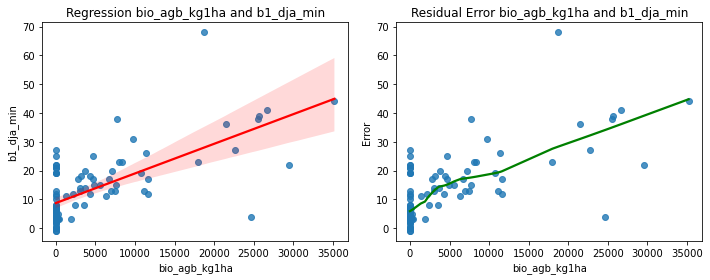

b1_dja_max
slope:  0.001367536686170447
intersept:  14.094279691428847
r2:  0.7388524742517909
P_value:  4.1966274546511463e-17
std error:  0.0001314723196576209


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


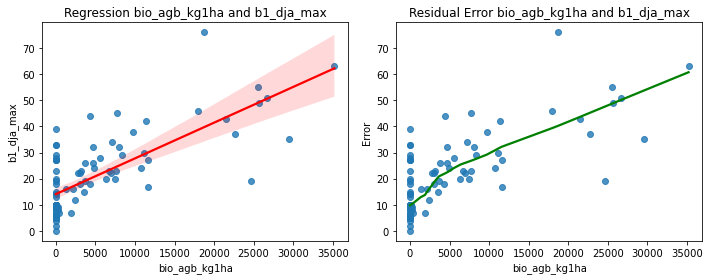

b1_dja_mean
slope:  0.001196277915760649
intersept:  11.603635443868496
r2:  0.7179020322682647
P_value:  8.056377702900772e-16
std error:  0.00012227701361718847


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


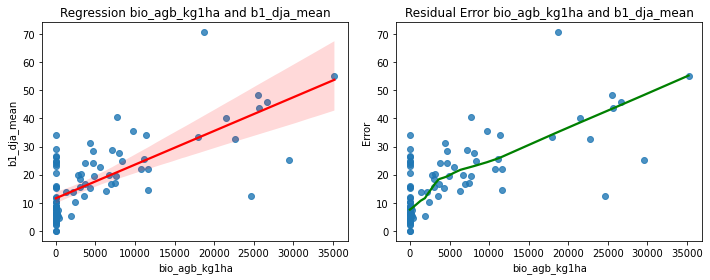

b1_dja_med
slope:  0.001189282273663165
intersept:  11.727672776917187
r2:  0.7119010826663102
P_value:  1.789060363270149e-15
std error:  0.00012366710208797769


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


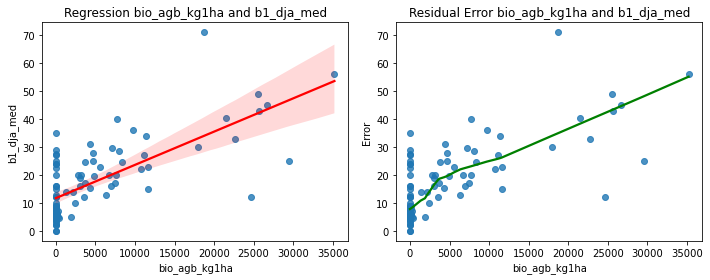

b1_dja_std
slope:  7.983510596734114e-05
intersept:  1.4979188040994411
r2:  0.500259740411454
P_value:  3.8215540026634963e-07
std error:  1.4565738022589936e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


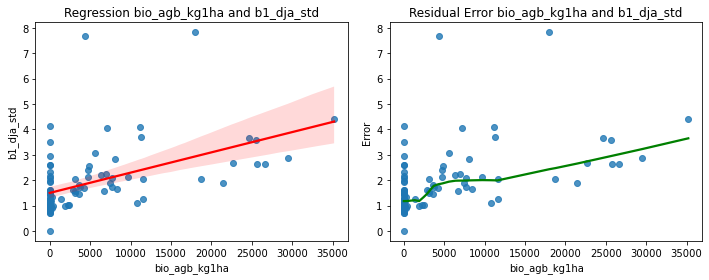

b1_dja_p25
slope:  0.00113961555542627
intersept:  10.686348337695964
r2:  0.70988336637299
P_value:  2.328918398476517e-15
std error:  0.00011918447074358958


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


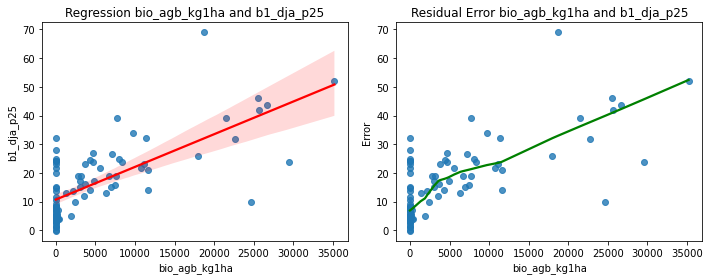

b1_dja_p50
slope:  0.001189282273663165
intersept:  11.727672776917187
r2:  0.7119010826663102
P_value:  1.789060363270149e-15
std error:  0.00012366710208797769


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


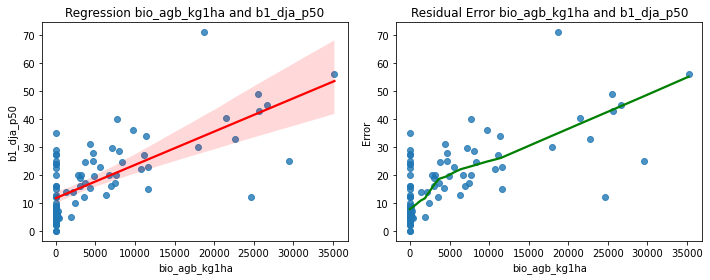

b1_dja_p75
slope:  0.0012609414148444986
intersept:  12.532925025127408
r2:  0.7231942356047528
P_value:  3.9180776013024987e-16
std error:  0.0001269326596697792


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


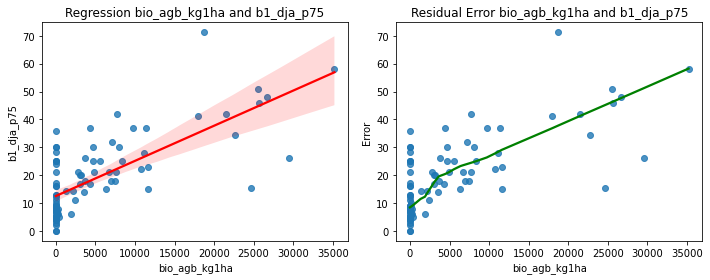

b1_dja_p95
slope:  0.0013018692924750789
intersept:  13.667312172083605
r2:  0.7246047344176975
P_value:  3.224118395216331e-16
std error:  0.00013051727061691383


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


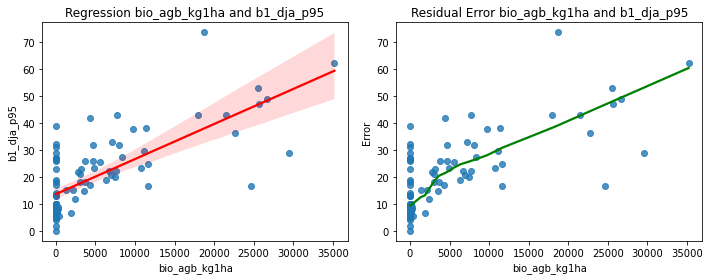

b1_dja_p99
slope:  0.0013547595033202259
intersept:  14.007174772022822
r2:  0.7363961874574054
P_value:  6.020393036376974e-17
std error:  0.0001311987434134187


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


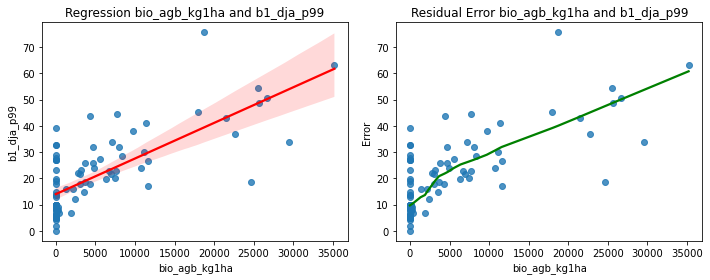

b1_dbi_min
slope:  -0.014575294722114638
intersept:  556.8472671197961
r2:  -0.5111577702235892
P_value:  1.9236370468658077e-07
std error:  0.002583332965963715


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


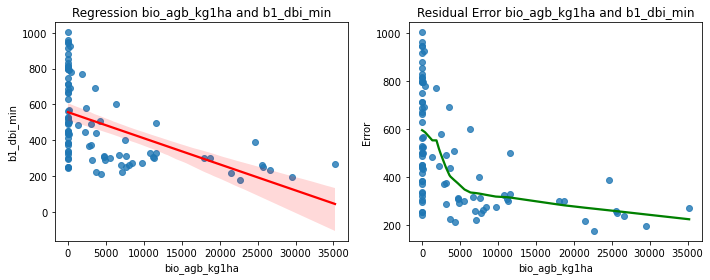

b1_dbi_max
slope:  -0.015644473519775322
intersept:  674.3198686584082
r2:  -0.4837683168235933
P_value:  1.0331534409160149e-06
std error:  0.002983373653972489


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


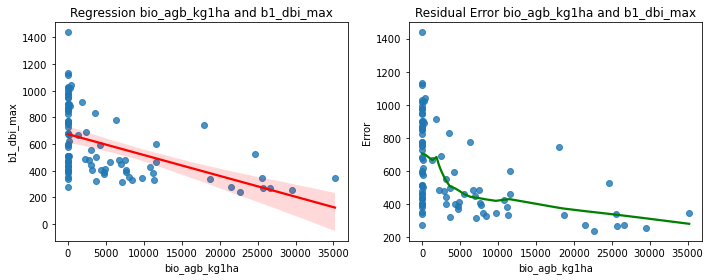

b1_dbi_mean
slope:  -0.015387574478816954
intersept:  613.6856468740166
r2:  -0.5136581898230801
P_value:  1.6377517438060572e-07
std error:  0.0027093144127488993


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


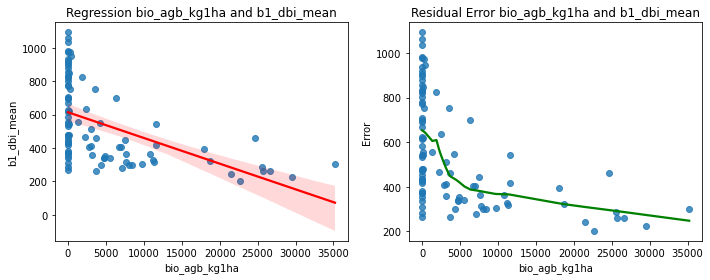

b1_dbi_med
slope:  -0.015407409128950361
intersept:  612.7137729950867
r2:  -0.5150931776895058
P_value:  1.4924285340096235e-07
std error:  0.002702535335282845


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


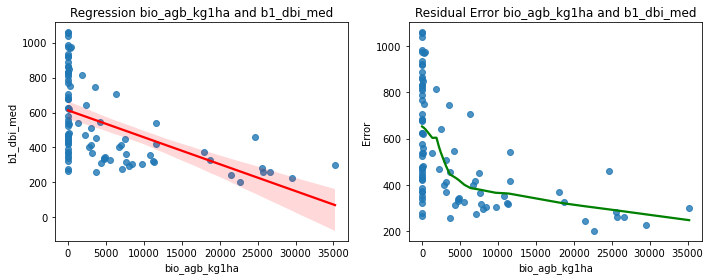

b1_dbi_std
slope:  -0.00034736749225652825
intersept:  31.748392288866125
r2:  -0.12579331769823904
P_value:  0.23215617417261405
std error:  0.00028876645503025727


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


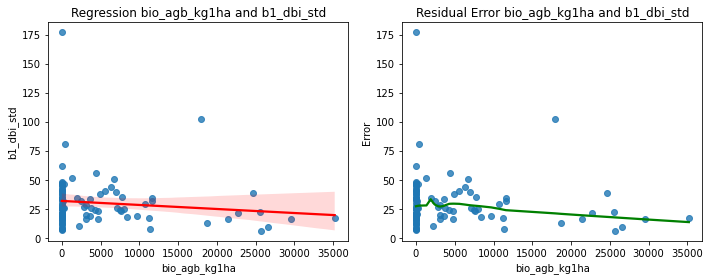

b1_dbi_p25
slope:  -0.015182281731580241
intersept:  593.4449062498848
r2:  -0.5158027898779203
P_value:  1.425178540542335e-07
std error:  0.002658058880475495


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


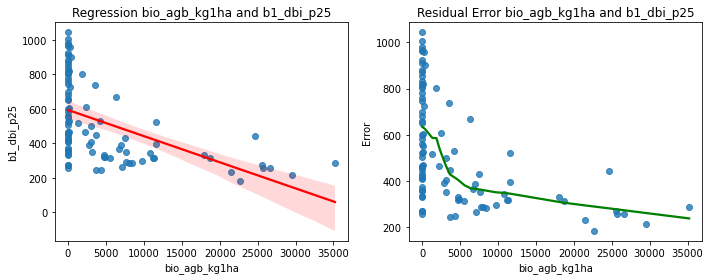

b1_dbi_p50
slope:  -0.015407409128950361
intersept:  612.7137729950867
r2:  -0.5150931776895058
P_value:  1.4924285340096235e-07
std error:  0.002702535335282845


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


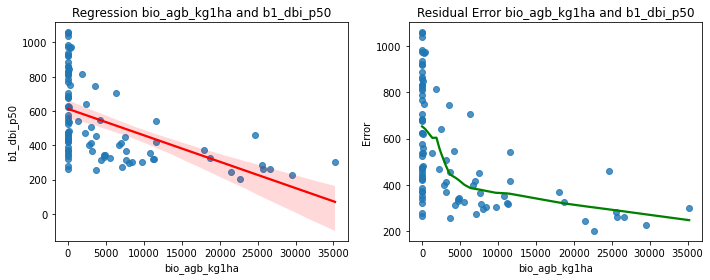

b1_dbi_p75
slope:  -0.01571397868874191
intersept:  633.6156831610866
r2:  -0.514689136637445
P_value:  1.5320561950219125e-07
std error:  0.0027592538995493783


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


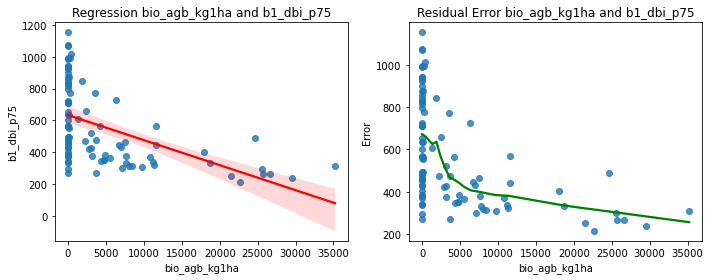

b1_dbi_p95
slope:  -0.01583716581143098
intersept:  662.7601119987506
r2:  -0.4956496594348021
P_value:  5.073032516102333e-07
std error:  0.002925246674508272


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


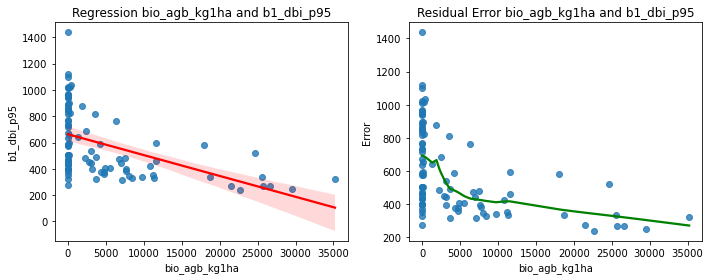

b1_dbi_p99
slope:  -0.01568580306541066
intersept:  671.9782804305731
r2:  -0.48644933663840034
P_value:  8.820132193536928e-07
std error:  0.002969713758143474


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


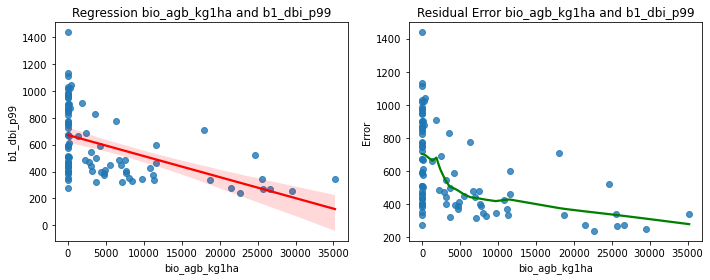

b2_dbi_min
slope:  -0.02198048127308385
intersept:  853.7430917971817
r2:  -0.5477746508473458
P_value:  1.593777479819206e-08
std error:  0.003538712890045473


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


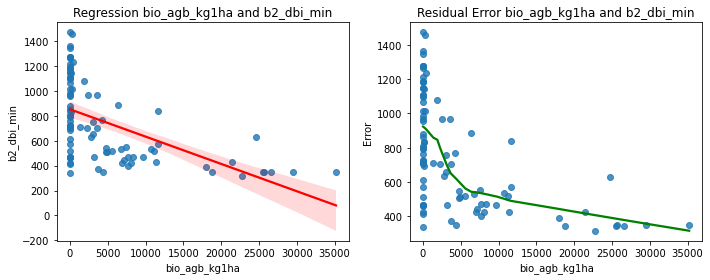

b2_dbi_max
slope:  -0.02317909987942015
intersept:  1013.3483082160737
r2:  -0.5135036500876266
P_value:  1.654180758407663e-07
std error:  0.00408284889006676


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


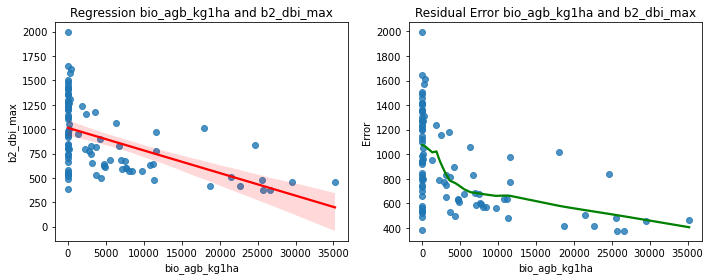

b2_dbi_mean
slope:  -0.02302235504953162
intersept:  931.4773365465036
r2:  -0.5474297108873186
P_value:  1.6339122652090248e-08
std error:  0.00370978391199538


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


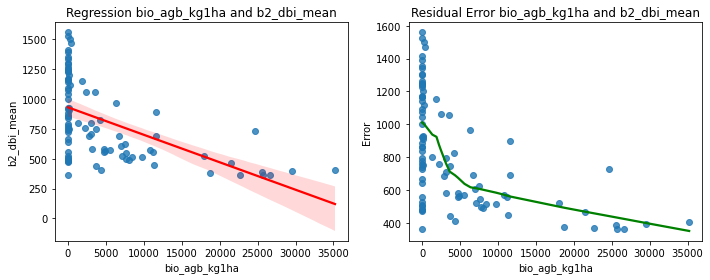

b2_dbi_med
slope:  -0.023090773018737985
intersept:  929.9077386256981
r2:  -0.5503023956294086
P_value:  1.3270995104835706e-08
std error:  0.003693042538512957


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


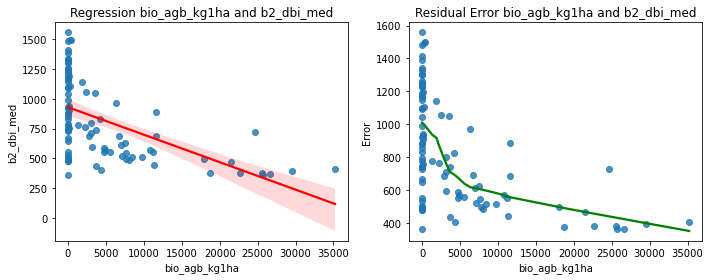

b2_dbi_std
slope:  -0.0004449385920277927
intersept:  44.005561578219094
r2:  -0.11972565659342142
P_value:  0.2556380763326939
std error:  0.0003889165555401941


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


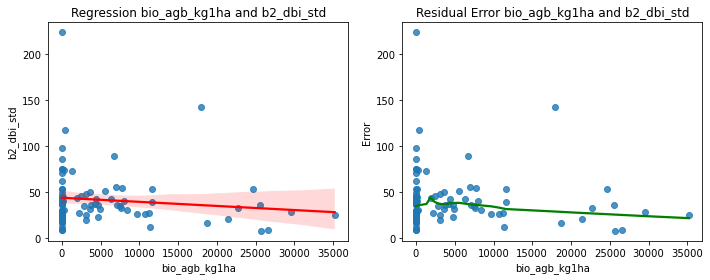

b2_dbi_p25
slope:  -0.022771297343651343
intersept:  902.568835809968
r2:  -0.5506836303783649
P_value:  1.2907804187342908e-08
std error:  0.003638329891576963


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


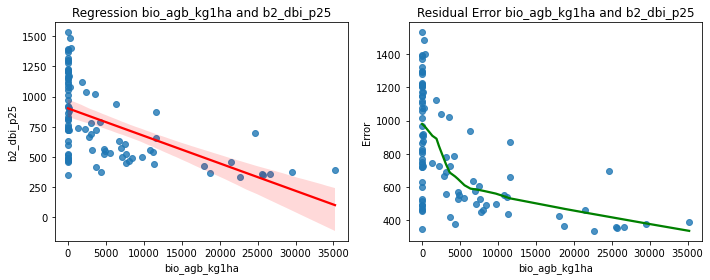

b2_dbi_p50
slope:  -0.023090773018737985
intersept:  929.9077386256981
r2:  -0.5503023956294086
P_value:  1.3270995104835706e-08
std error:  0.003693042538512957


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


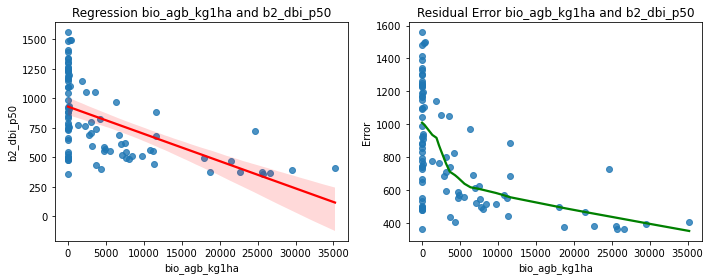

b2_dbi_p75
slope:  -0.023430317722511508
intersept:  959.8077140180018
r2:  -0.546296520979348
P_value:  1.7726641520640734e-08
std error:  0.003786700285802321


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


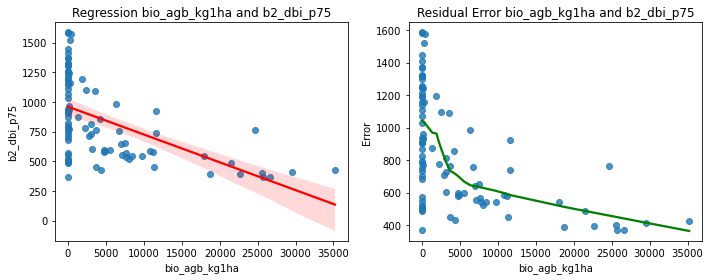

b2_dbi_p95
slope:  -0.023614736487482864
intersept:  1000.2468036314734
r2:  -0.5300157082119189
P_value:  5.533929232731843e-08
std error:  0.003982563637522101


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


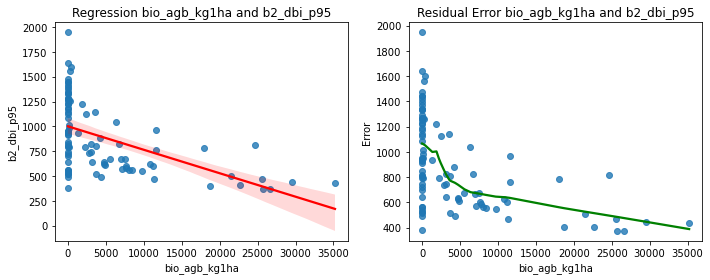

b2_dbi_p99
slope:  -0.023267507109732546
intersept:  1010.7154595024654
r2:  -0.5169843813005578
P_value:  1.3195479560544196e-07
std error:  0.004060900229439692


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


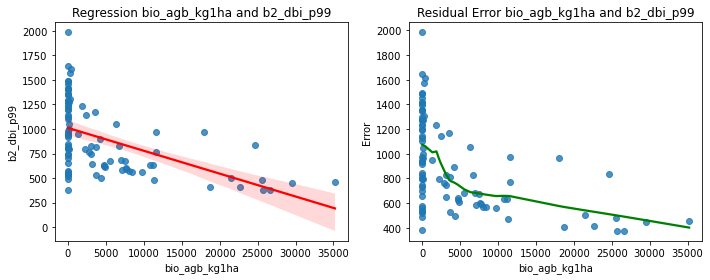

b3_dbi_min
slope:  -0.037272627260065576
intersept:  1249.0445193838748
r2:  -0.608368404698244
P_value:  1.2548513781624081e-10
std error:  0.0051254703768574385


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


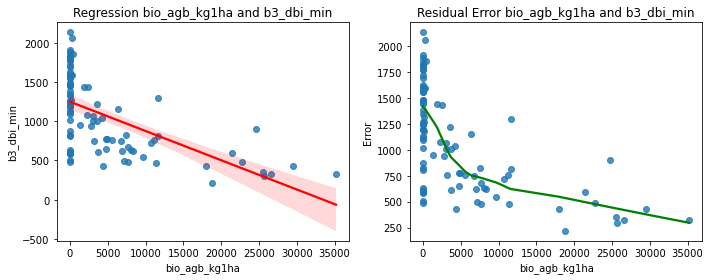

b3_dbi_max
slope:  -0.03775707985743031
intersept:  1476.2410822680838
r2:  -0.5675644149016713
P_value:  3.6456260694611787e-09
std error:  0.005773449825465494


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


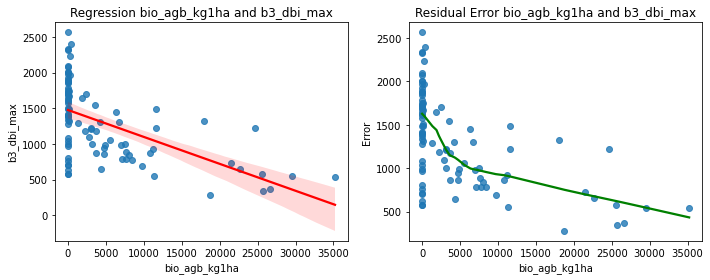

b3_dbi_mean
slope:  -0.038305288870688084
intersept:  1361.7342702678445
r2:  -0.6017852858123098
P_value:  2.2319541591887556e-10
std error:  0.005358666435400821


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


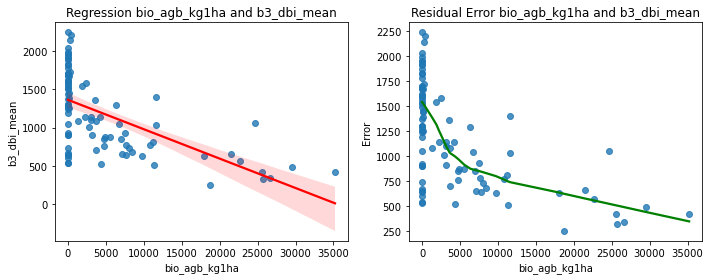

b3_dbi_med
slope:  -0.038615176703977565
intersept:  1361.5313040610986
r2:  -0.603427558734131
P_value:  1.935659383512471e-10
std error:  0.005378950756414131


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


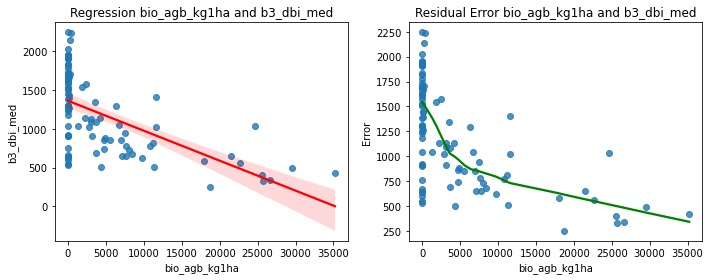

b3_dbi_std
slope:  -0.00035197108105414063
intersept:  62.90395075220711
r2:  -0.069779667066863
P_value:  0.5086390813131152
std error:  0.0005303919427265197


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


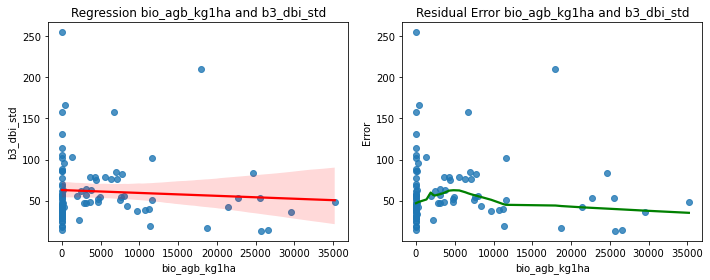

b3_dbi_p25
slope:  -0.038108421946547365
intersept:  1320.124355121662
r2:  -0.6052972708118047
P_value:  1.644282031905507e-10
std error:  0.005282552149005286


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


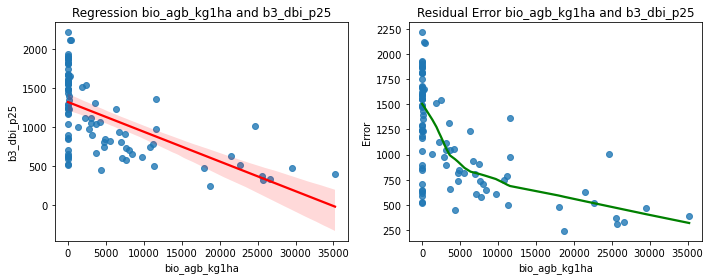

b3_dbi_p50
slope:  -0.038615176703977565
intersept:  1361.5313040610986
r2:  -0.603427558734131
P_value:  1.935659383512471e-10
std error:  0.005378950756414131


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


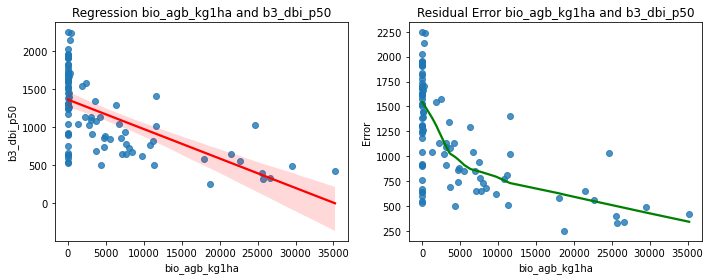

b3_dbi_p75
slope:  -0.038710798666791314
intersept:  1404.7786537451152
r2:  -0.5989187335368614
P_value:  2.8563846115327974e-10
std error:  0.00545597489861382


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


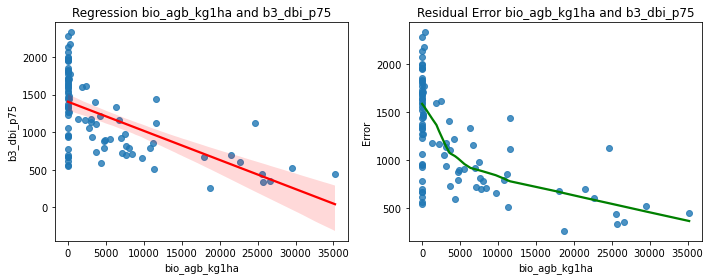

b3_dbi_p95
slope:  -0.038636747694460065
intersept:  1456.4381780494637
r2:  -0.5851141332484456
P_value:  9.062299070589287e-10
std error:  0.00564460177718284


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


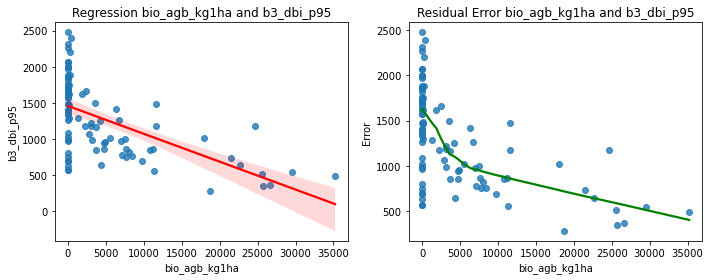

b3_dbi_p99
slope:  -0.03793975760203815
intersept:  1472.2081134910127
r2:  -0.5713819861906431
P_value:  2.711932280872122e-09
std error:  0.005744111316306197


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


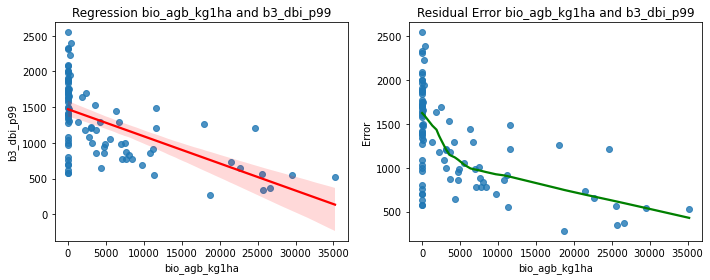

b4_dbi_min
slope:  -0.021727837405293795
intersept:  2287.2904232493183
r2:  -0.38714926739800976
P_value:  0.0001376078000064081
std error:  0.005454510214673711


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


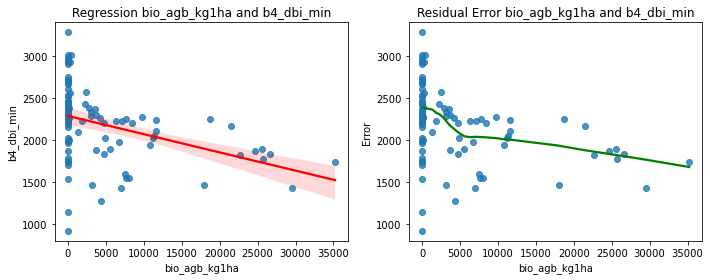

b4_dbi_max
slope:  -0.016179175550264078
intersept:  2592.8773626114344
r2:  -0.298024655985729
P_value:  0.003909908653558656
std error:  0.005462423117357112


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


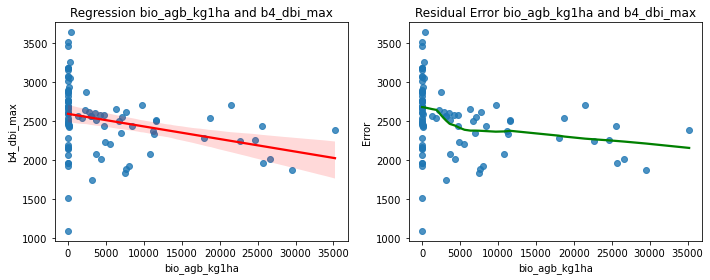

b4_dbi_mean
slope:  -0.019419880347812737
intersept:  2437.3585629266277
r2:  -0.3570121257010241
P_value:  0.0004769325721535827
std error:  0.005355938527223233


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


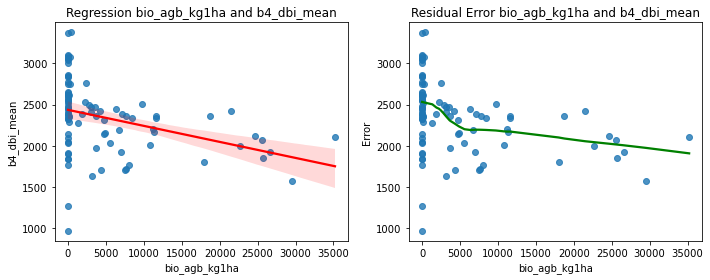

b4_dbi_med
slope:  -0.019510138035470723
intersept:  2435.621722181249
r2:  -0.3559008387540783
P_value:  0.0004981647081528068
std error:  0.005400082655542355


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


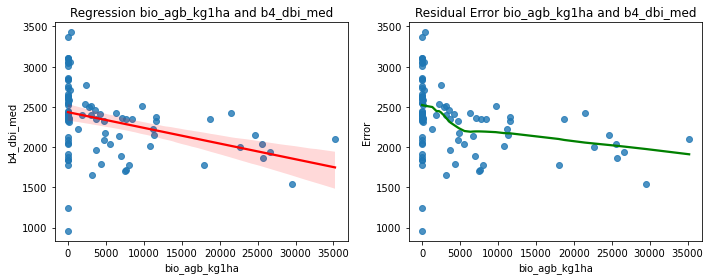

b4_dbi_std
slope:  0.001360348967412176
intersept:  84.69604847756838
r2:  0.22178803246007114
P_value:  0.03360592193524382
std error:  0.0006304314267397506


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


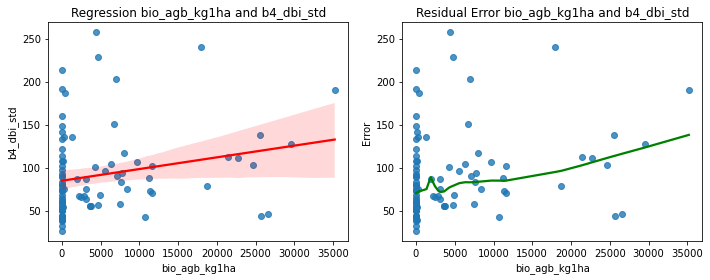

b4_dbi_p25
slope:  -0.020320961700571703
intersept:  2379.2337871588397
r2:  -0.3656746100129549
P_value:  0.0003377843422331496
std error:  0.005452025280148504


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


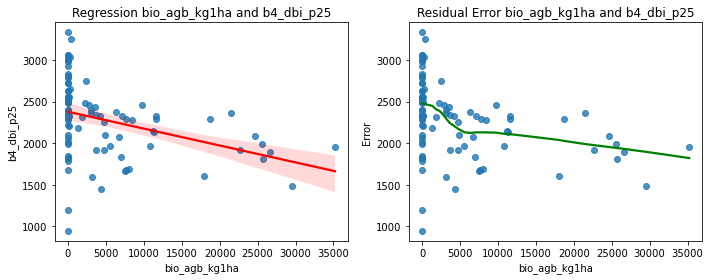

b4_dbi_p50
slope:  -0.019510138035470723
intersept:  2435.621722181249
r2:  -0.3559008387540783
P_value:  0.0004981647081528068
std error:  0.005400082655542355


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


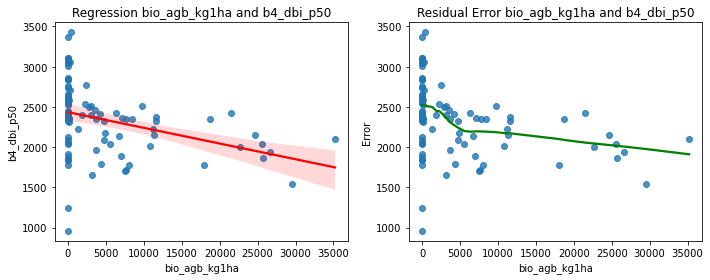

b4_dbi_p75
slope:  -0.018589952831193364
intersept:  2495.6446810259818
r2:  -0.34538215858004223
P_value:  0.0007465447370925349
std error:  0.005324439351966775


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


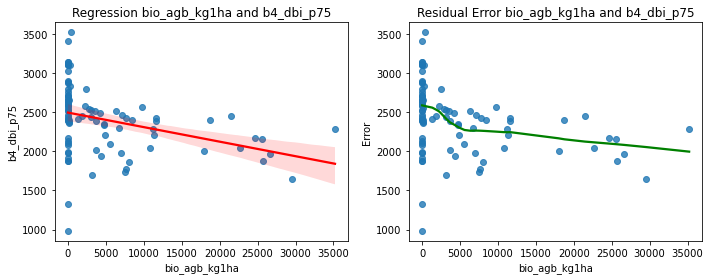

b4_dbi_p95
slope:  -0.016776239954177867
intersept:  2562.9050573386844
r2:  -0.31180806275863837
P_value:  0.0024807483315088647
std error:  0.005388600308027419


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


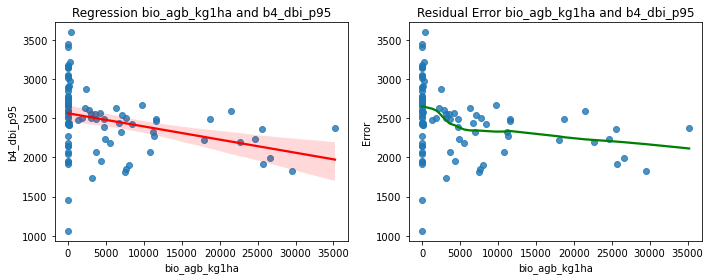

b4_dbi_p99
slope:  -0.01627358484238216
intersept:  2586.737583060123
r2:  -0.3004486137969307
P_value:  0.003614868484066233
std error:  0.00544563064919858


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


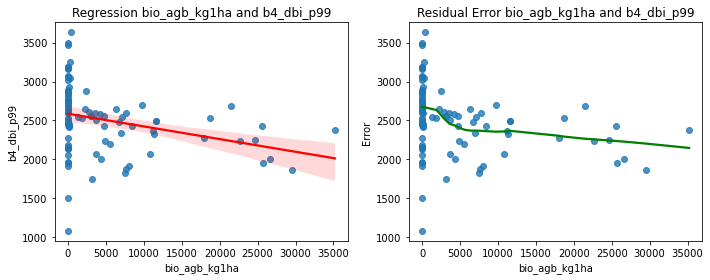

b5_dbi_min
slope:  -0.05686866636402037
intersept:  2751.410376606416
r2:  -0.6438597487294158
P_value:  4.418242893514584e-12
std error:  0.007123663955900536


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


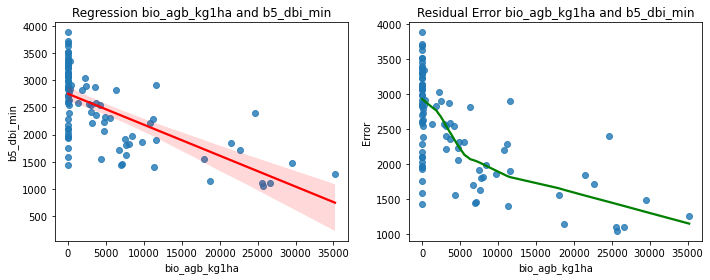

b5_dbi_max
slope:  -0.053342121020877625
intersept:  3133.058084933266
r2:  -0.601611583166799
P_value:  2.265725370490638e-10
std error:  0.007465601221876483


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


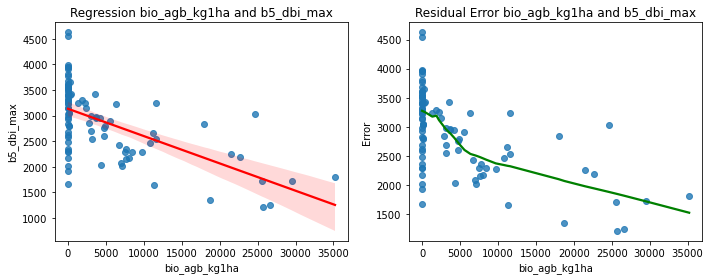

b5_dbi_mean
slope:  -0.05660509614459628
intersept:  2946.8718281768033
r2:  -0.6418958579392223
P_value:  5.378015722280576e-12
std error:  0.007127663367682462


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


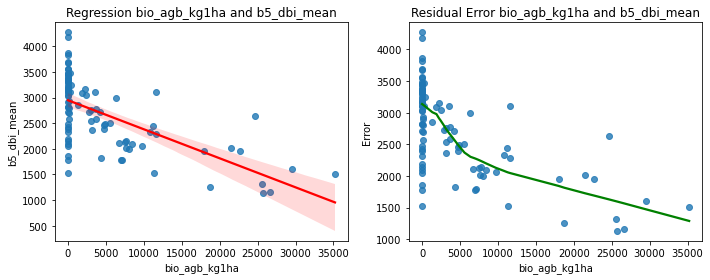

b5_dbi_med
slope:  -0.05683032464532466
intersept:  2946.454468600776
r2:  -0.6453812911825182
P_value:  3.790368718053595e-12
std error:  0.0070901693774381176


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


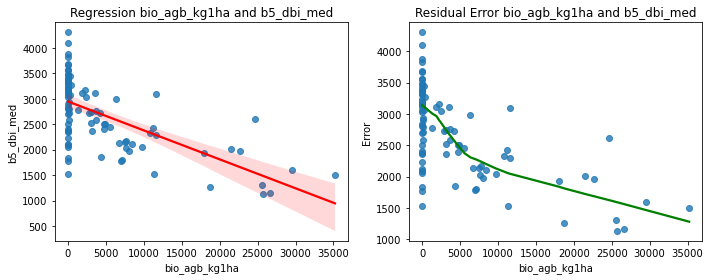

b5_dbi_std
slope:  0.0007274551942920253
intersept:  104.94441803066968
r2:  0.11082044268053434
P_value:  0.29295449655703193
std error:  0.0006876726949850777


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


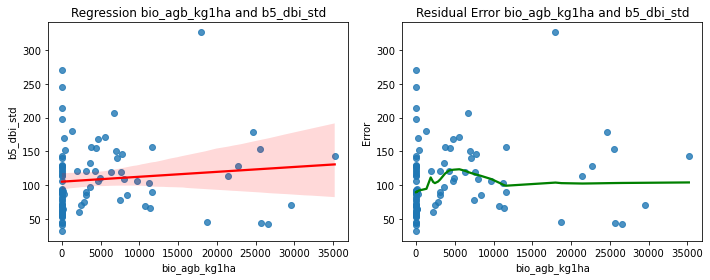

b5_dbi_p25
slope:  -0.05730943502553073
intersept:  2876.5302622253657
r2:  -0.6488892916254646
P_value:  2.6532190494564613e-12
std error:  0.007083567740359544


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


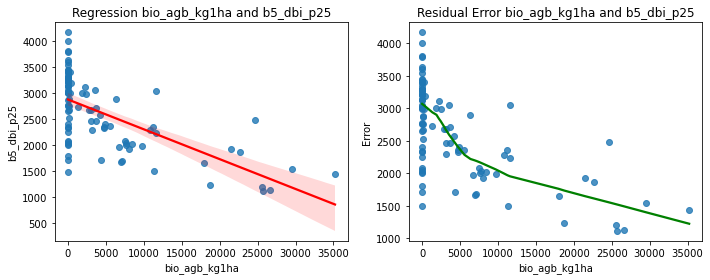

b5_dbi_p50
slope:  -0.05683032464532466
intersept:  2946.454468600776
r2:  -0.6453812911825182
P_value:  3.790368718053595e-12
std error:  0.0070901693774381176


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


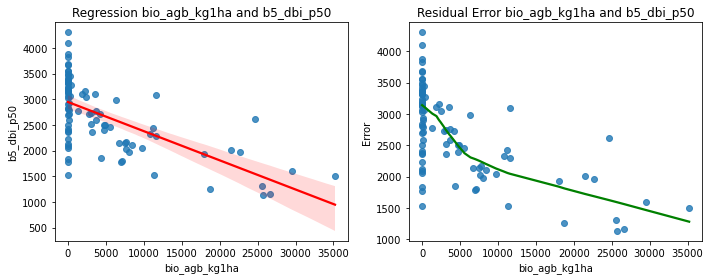

b5_dbi_p75
slope:  -0.05650884767688813
intersept:  3019.8532354718977
r2:  -0.6382272121055733
P_value:  7.735118300292575e-12
std error:  0.007184968946101087


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


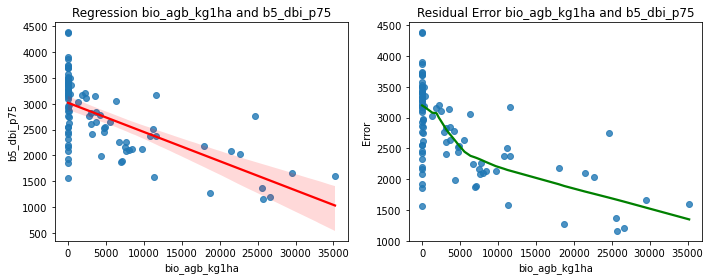

b5_dbi_p95
slope:  -0.054724398427392996
intersept:  3101.9770014547285
r2:  -0.6149677066636939
P_value:  6.951138191721676e-11
std error:  0.007396698730520048


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


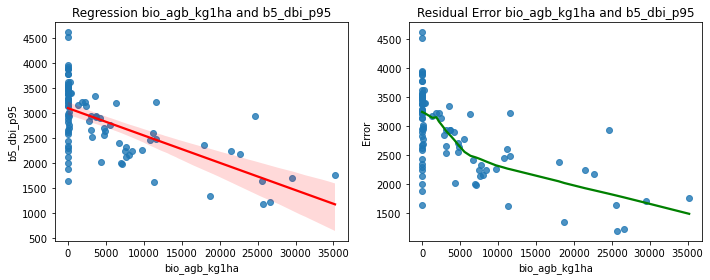

b5_dbi_p99
slope:  -0.053597511890607415
intersept:  3126.678513523235
r2:  -0.604358411876488
P_value:  1.7848911948919811e-10
std error:  0.007447842248660031


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


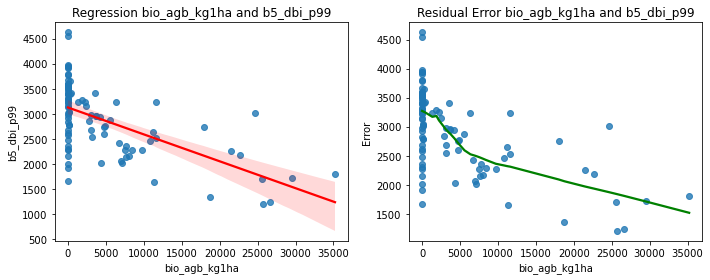

b6_dbi_min
slope:  -0.04742288752264446
intersept:  1795.6585155073356
r2:  -0.6548410925770649
P_value:  1.4331408989835847e-12
std error:  0.005769238673215553


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


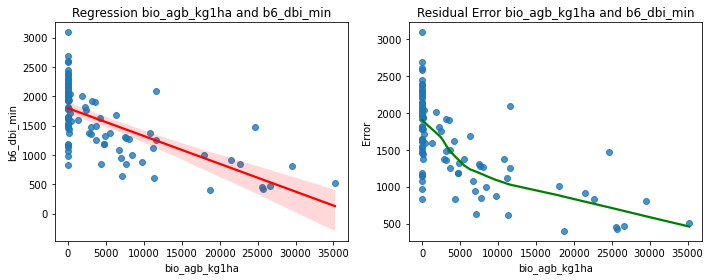

b6_dbi_max
slope:  -0.046175729709066395
intersept:  2134.9614524063954
r2:  -0.5901666746085653
P_value:  5.976568826389761e-10
std error:  0.006657984643244568


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


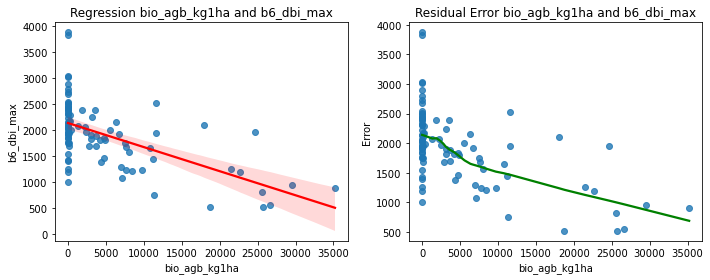

b6_dbi_mean
slope:  -0.04812996532412187
intersept:  1966.6377414323615
r2:  -0.6418744561297717
P_value:  5.38950704103153e-12
std error:  0.006060826106399542


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


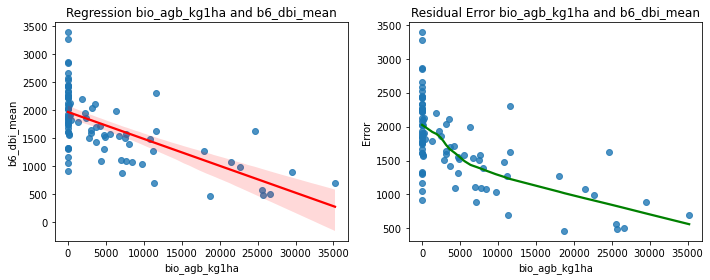

b6_dbi_med
slope:  -0.04866799173062283
intersept:  1966.8511491947484
r2:  -0.646885370639904
P_value:  3.2546880188346354e-12
std error:  0.006047618436553515


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


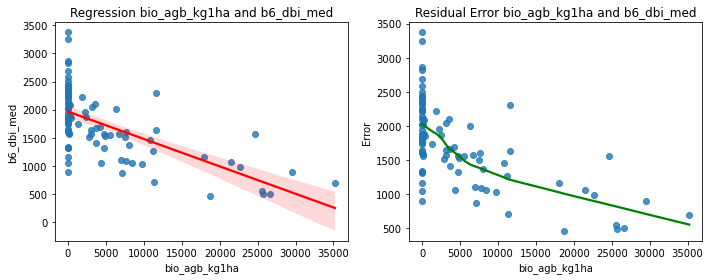

b6_dbi_std
slope:  0.00016540888995598822
intersept:  90.88884174212677
r2:  0.02565016364429147
P_value:  0.8082348677644969
std error:  0.0006795235888370012


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


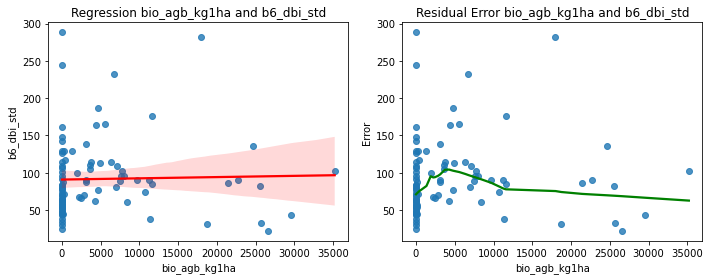

b6_dbi_p25
slope:  -0.04830986050897822
intersept:  1905.660809207707
r2:  -0.6503966589514624
P_value:  2.272945880796745e-12
std error:  0.005947277213316813


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


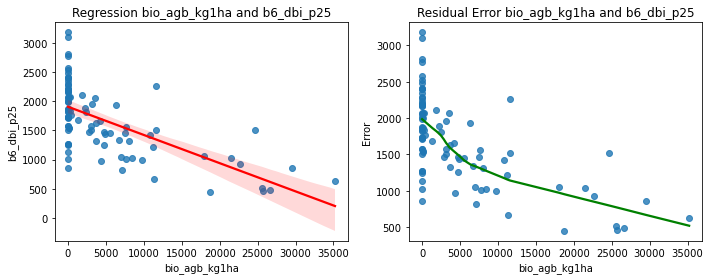

b6_dbi_p50
slope:  -0.04866799173062283
intersept:  1966.8511491947484
r2:  -0.646885370639904
P_value:  3.2546880188346354e-12
std error:  0.006047618436553515


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


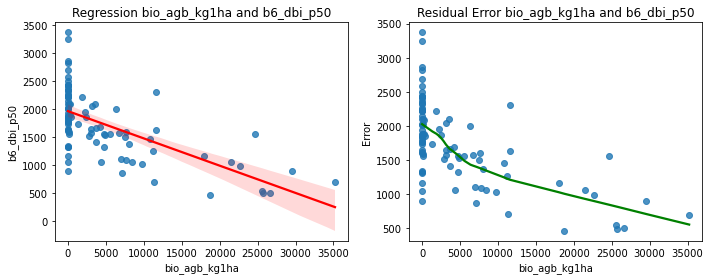

b6_dbi_p75
slope:  -0.04818236436225819
intersept:  2024.811986946981
r2:  -0.6364793806295098
P_value:  9.181816884070923e-12
std error:  0.006154635075952086


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


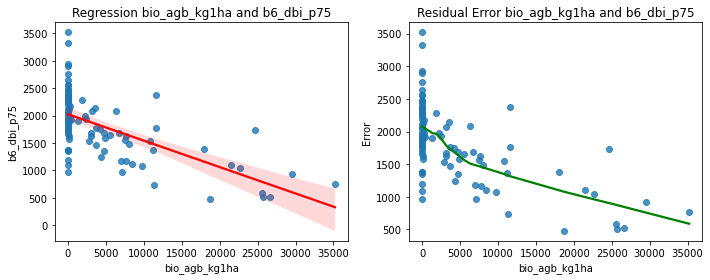

b6_dbi_p95
slope:  -0.04762765111824467
intersept:  2102.9154372545477
r2:  -0.6101924548500037
P_value:  1.0672766182619636e-10
std error:  0.006518311185610546


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


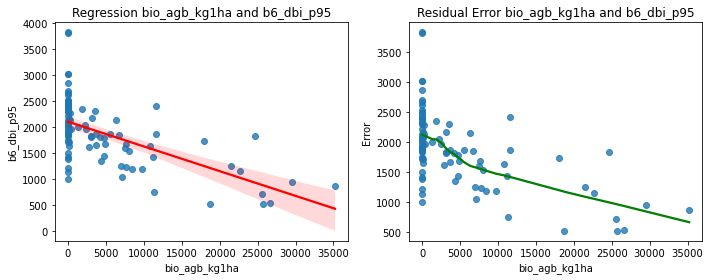

b6_dbi_p99
slope:  -0.04648111572953514
intersept:  2128.4138732653846
r2:  -0.5947512437757027
P_value:  4.0709333064559605e-10
std error:  0.006622580571435066


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


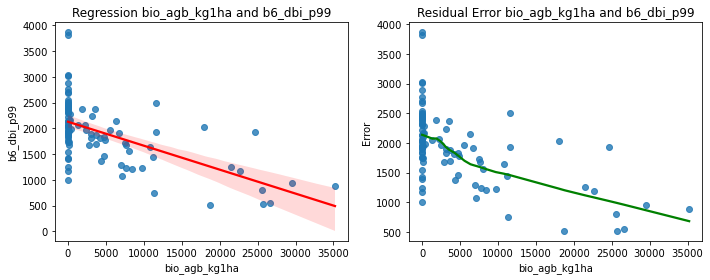

b1_dim_min
slope:  -0.0006316931429402629
intersept:  17.599463626669273
r2:  -0.35027387549384414
P_value:  0.0006195934688723728
std error:  0.00017805462446637043


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


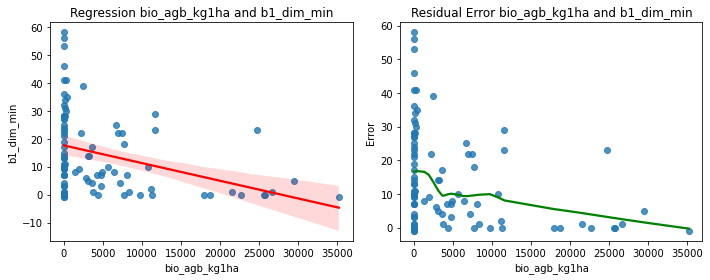

b1_dim_max
slope:  -0.0007772015134345016
intersept:  28.189696291702028
r2:  -0.34873450094811137
P_value:  0.0006572353251803357
std error:  0.0002201708085493035


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


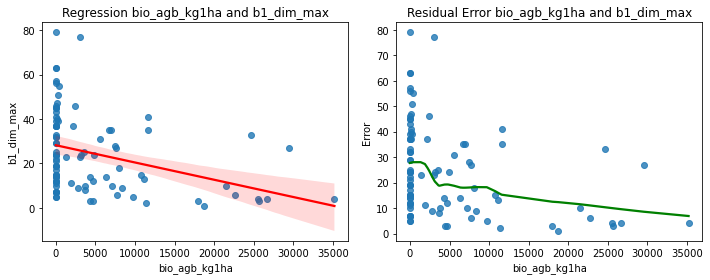

b1_dim_mean
slope:  -0.0007278377629841623
intersept:  22.847534183270383
r2:  -0.36888215070775354
P_value:  0.0002965436984194012
std error:  0.00019331428634050083


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


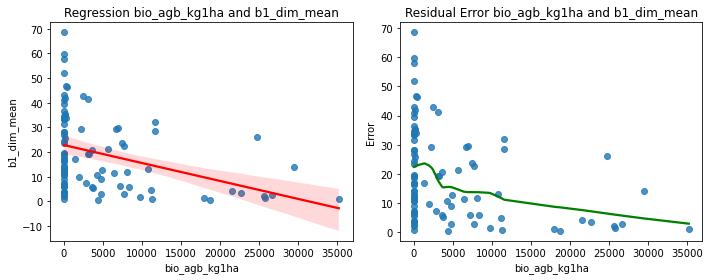

b1_dim_med
slope:  -0.0007405074415962258
intersept:  22.81778947488236
r2:  -0.3704766432935003
P_value:  0.0002778163899890729
std error:  0.00019569921457117642


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


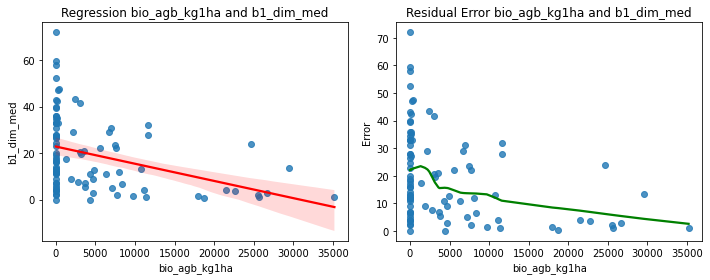

b1_dim_std
slope:  -3.580811576443189e-05
intersept:  2.857555620601987
r2:  -0.12594619508096644
P_value:  0.23158465947992704
std error:  2.9730558326655716e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


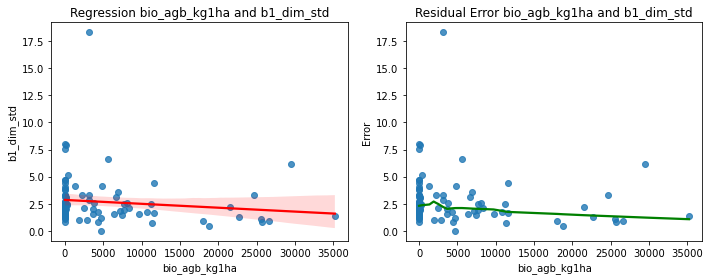

b1_dim_p25
slope:  -0.0007114519913756128
intersept:  21.028769319385272
r2:  -0.3722715153151516
P_value:  0.00025804277347075966
std error:  0.0001869693765911296


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


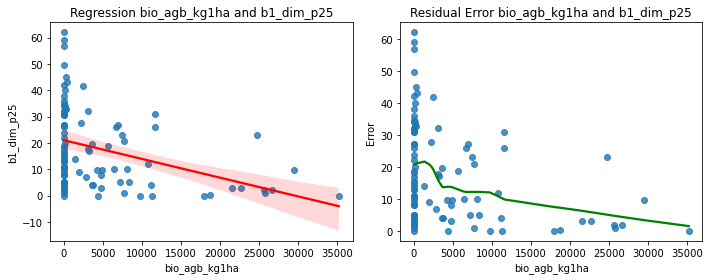

b1_dim_p50
slope:  -0.0007405074415962258
intersept:  22.81778947488236
r2:  -0.3704766432935003
P_value:  0.0002778163899890729
std error:  0.00019569921457117642


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


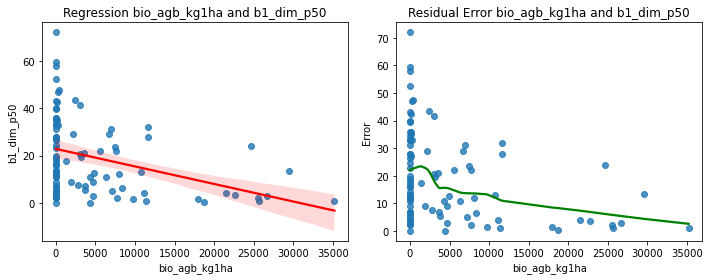

b1_dim_p75
slope:  -0.0007545623982979474
intersept:  24.659756939136898
r2:  -0.3660422121677104
P_value:  0.0003328037560852145
std error:  0.00020221108705384687


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


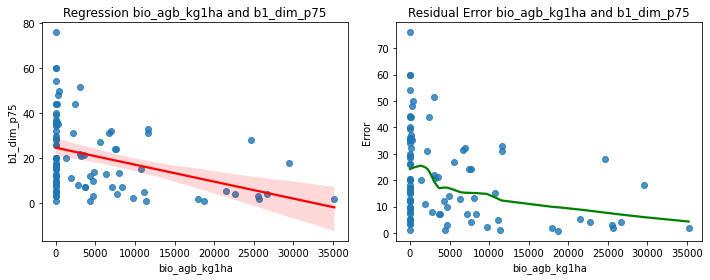

b1_dim_p95
slope:  -0.0007749794400620266
intersept:  27.07413158074771
r2:  -0.3569147915019122
P_value:  0.00047875851878934674
std error:  0.00021380355799764715


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


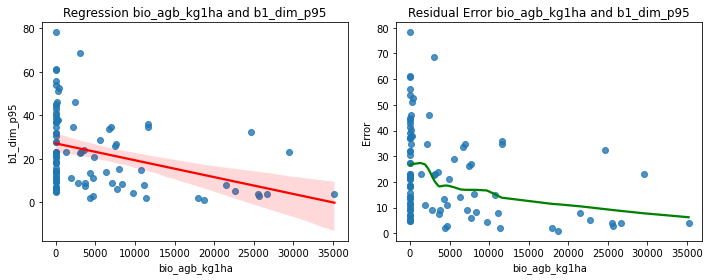

b1_dim_p99
slope:  -0.0007767880020106302
intersept:  27.960318745307433
r2:  -0.3505168929902081
P_value:  0.0006138346189770301
std error:  0.00021877930639179076


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


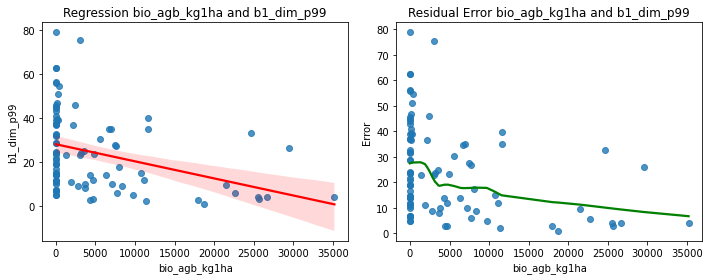

b2_dim_min
slope:  0.001174909282980476
intersept:  17.867363523367036
r2:  0.5283947508662682
P_value:  6.177951598061865e-08
std error:  0.0001989901913874718


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


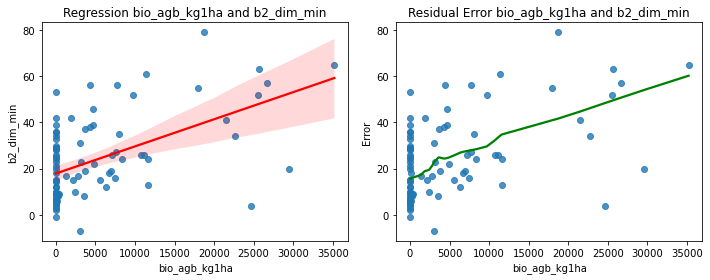

b2_dim_max
slope:  0.0013196930301067051
intersept:  25.911046264012917
r2:  0.5473795431406189
P_value:  1.6398291866788868e-08
std error:  0.0002126809641077787


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


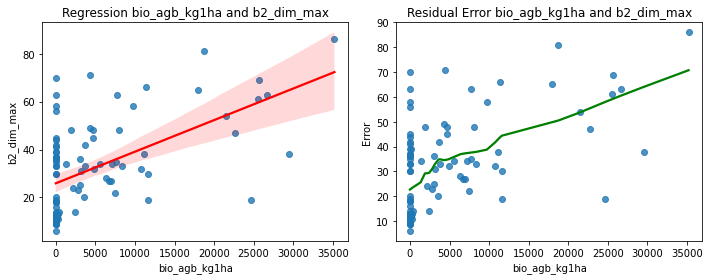

b2_dim_mean
slope:  0.00126217341903449
intersept:  21.75037711169624
r2:  0.5479083351889723
P_value:  1.5784774118034716e-08
std error:  0.00020313078051304101


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


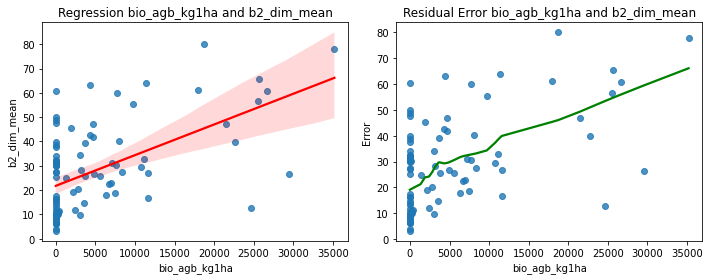

b2_dim_med
slope:  0.001286004462318387
intersept:  21.686994839658595
r2:  0.5536994931394676
P_value:  1.0351070647501494e-08
std error:  0.00020386576299665562


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


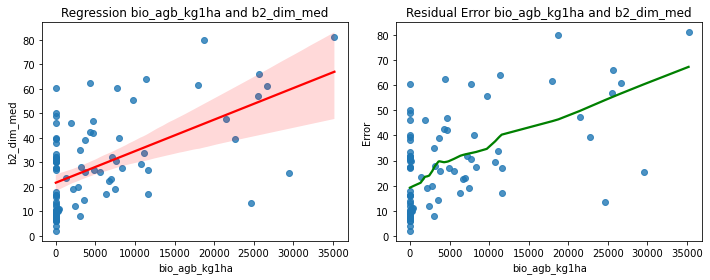

b2_dim_std
slope:  3.9062094553617336e-05
intersept:  2.1763369651160542
r2:  0.20707412189373692
P_value:  0.04764158553411325
std error:  1.9453229453673267e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


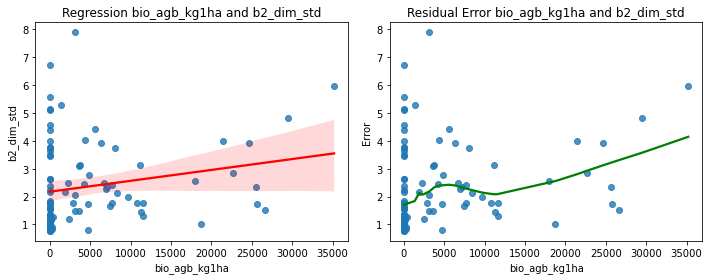

b2_dim_p25
slope:  0.0012300280740578655
intersept:  20.34173885324858
r2:  0.5418136545316906
P_value:  2.4399541954191164e-08
std error:  0.00020113184546151393


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


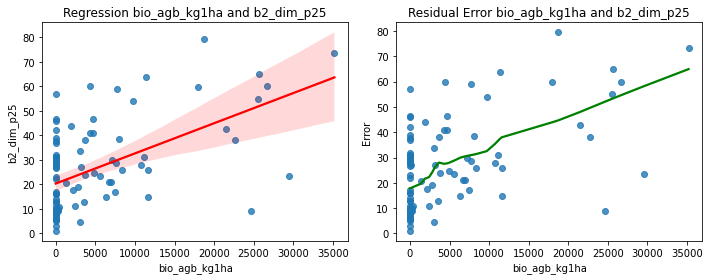

b2_dim_p50
slope:  0.001286004462318387
intersept:  21.686994839658595
r2:  0.5536994931394676
P_value:  1.0351070647501494e-08
std error:  0.00020386576299665562


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


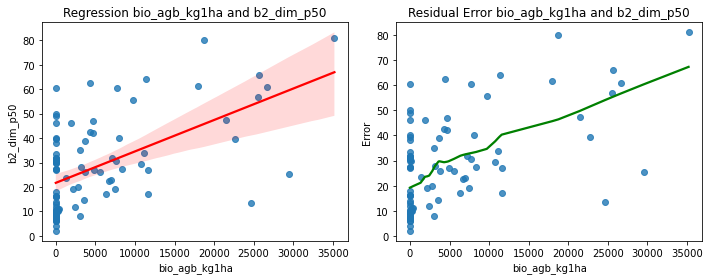

b2_dim_p75
slope:  0.0012942619365848944
intersept:  23.046787783461525
r2:  0.5485838790163884
P_value:  1.5032823233330736e-08
std error:  0.0002079283860159148


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


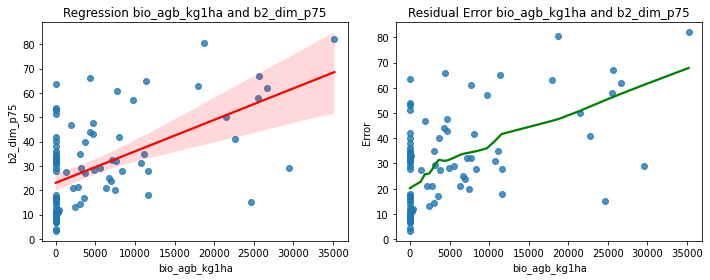

b2_dim_p95
slope:  0.0013034892542065507
intersept:  25.143226573439634
r2:  0.5426526864887453
P_value:  2.2991419019540807e-08
std error:  0.0002126774229359396


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


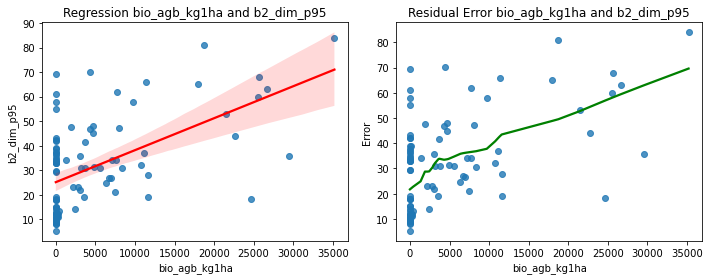

b2_dim_p99
slope:  0.0013160748970822201
intersept:  25.757447179459074
r2:  0.5462972574086231
P_value:  1.772570432526627e-08
std error:  0.00021269756868248004


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


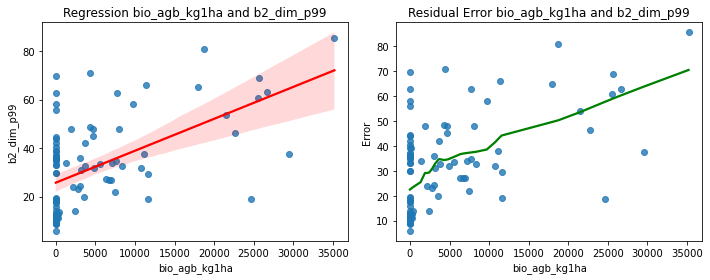

b3_dim_min
slope:  -0.0005093619671578515
intersept:  48.50099403170033
r2:  -0.2814903738974812
P_value:  0.006562976990665691
std error:  0.0001830272190689491


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


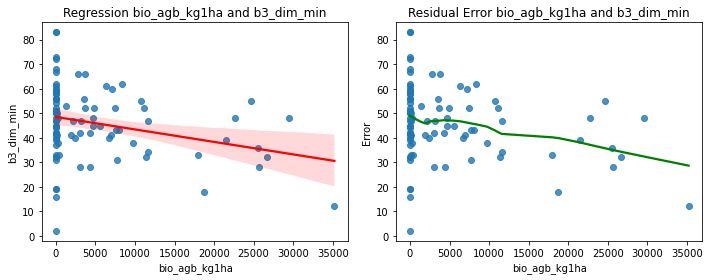

b3_dim_max
slope:  -0.0005269685003664879
intersept:  59.42252097770824
r2:  -0.3044908055061187
P_value:  0.003166905448049992
std error:  0.00017376454487203047


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


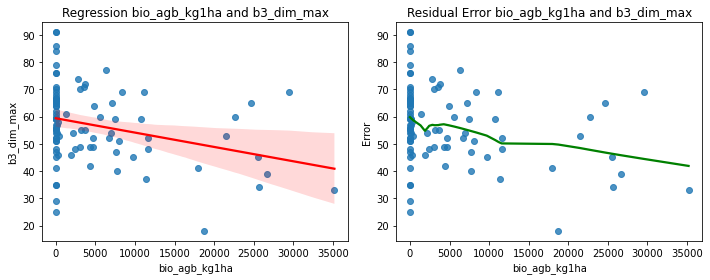

b3_dim_mean
slope:  -0.0005367840905444747
intersept:  54.07351371050505
r2:  -0.311020437639975
P_value:  0.002547566170369556
std error:  0.0001729009395895386


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


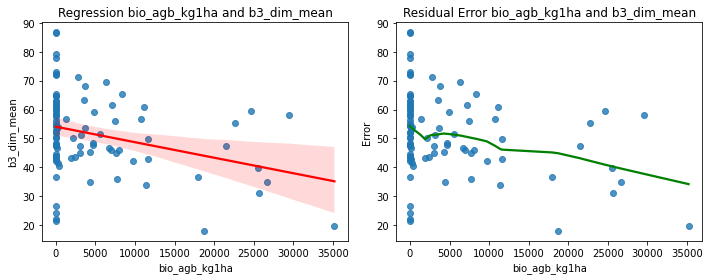

b3_dim_med
slope:  -0.0005470510168793226
intersept:  54.078767036746406
r2:  -0.31096768616628273
P_value:  0.0025520986090604224
std error:  0.00017624106197290974


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


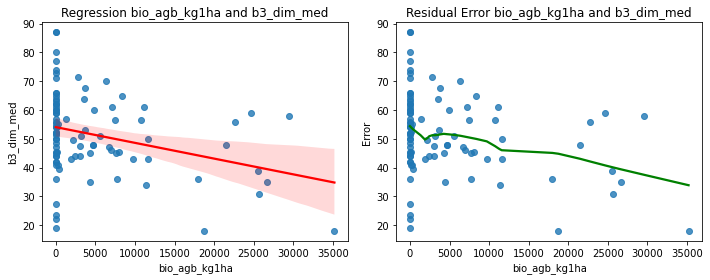

b3_dim_std
slope:  4.617785398805889e-06
intersept:  2.913565829449151
r2:  0.02052942248240772
P_value:  0.8459883914861964
std error:  2.370523263013164e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


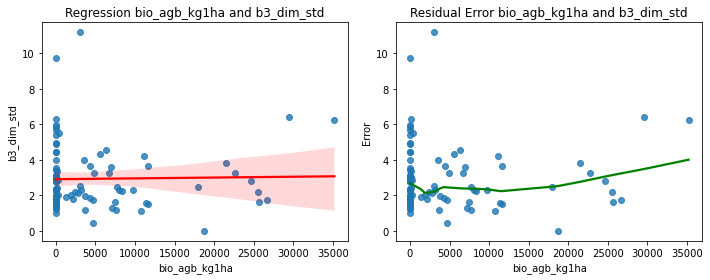

b3_dim_p25
slope:  -0.0005579374574052251
intersept:  52.23975412432911
r2:  -0.3179029428525869
P_value:  0.002014706901068508
std error:  0.0001754019906078182


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


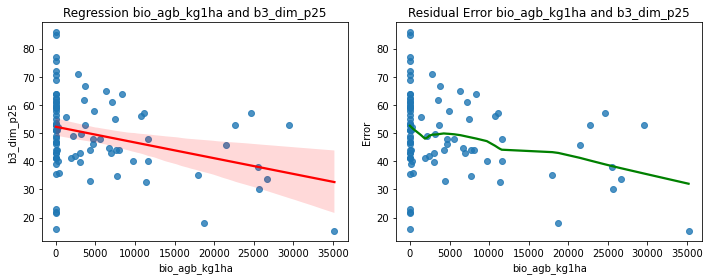

b3_dim_p50
slope:  -0.0005470510168793226
intersept:  54.078767036746406
r2:  -0.31096768616628273
P_value:  0.0025520986090604224
std error:  0.00017624106197290974


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


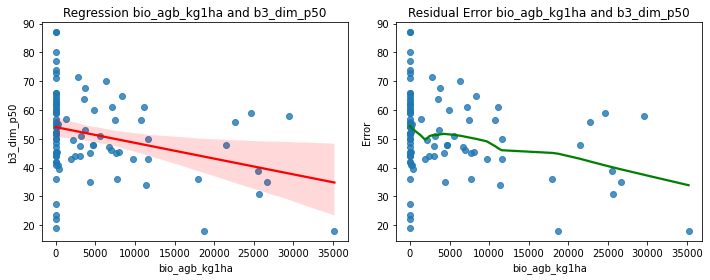

b3_dim_p75
slope:  -0.0005323020579378495
intersept:  55.994335598780054
r2:  -0.3102145060237642
P_value:  0.0026176078344678187
std error:  0.00017195033195887622


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


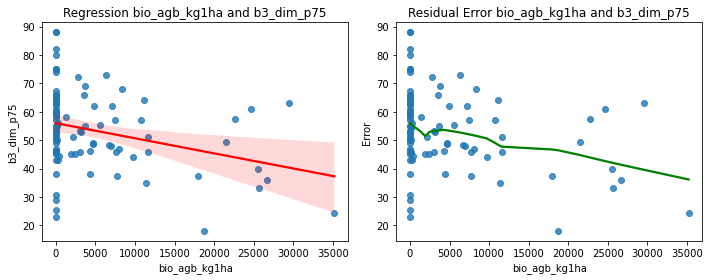

b3_dim_p95
slope:  -0.0005155732930075247
intersept:  58.37756836342965
r2:  -0.29965223311432104
P_value:  0.0037095292284498125
std error:  0.00017303027262723835


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


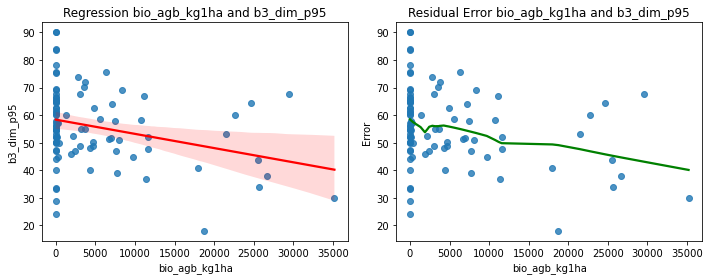

b3_dim_p99
slope:  -0.0005245303171249962
intersept:  59.21080951874388
r2:  -0.3036210351302905
P_value:  0.0032588602711141816
std error:  0.0001735065943809821


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


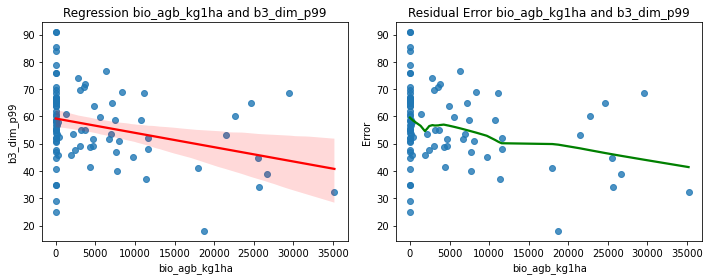

dis_min
slope:  -5.376269537403949e-05
intersept:  4.475632600560815
r2:  -0.1589385729095173
P_value:  0.13020894640148614
std error:  3.5202583441537283e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


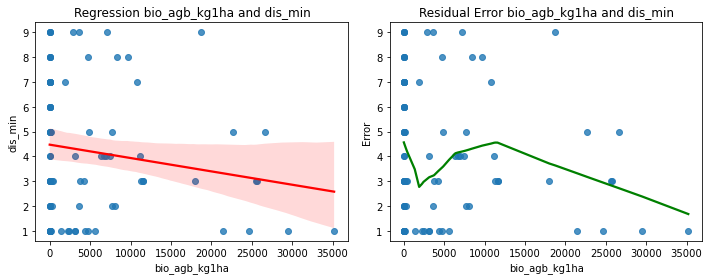

dis_max
slope:  8.820851176026022e-05
intersept:  7.032824968432667
r2:  0.2684177405569047
P_value:  0.0096806728440254
std error:  3.336881316574293e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


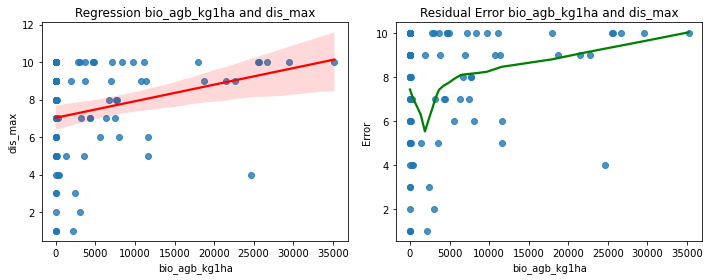

dis_mean
slope:  2.3751734513456433e-06
intersept:  5.733377005034686
r2:  0.007279962568869307
P_value:  0.9450906079284163
std error:  3.439009856710805e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


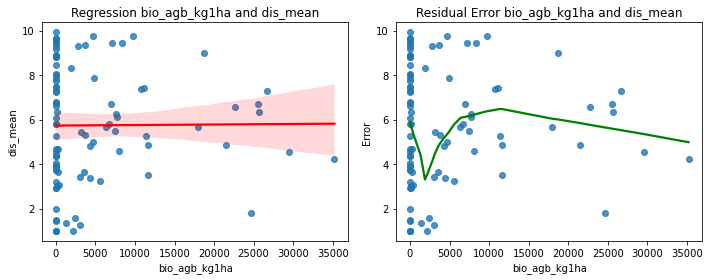

dis_med
slope:  -2.308236773474074e-06
intersept:  5.663261193028259
r2:  -0.006721000669672301
P_value:  0.9493007833073025
std error:  3.620056535675333e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


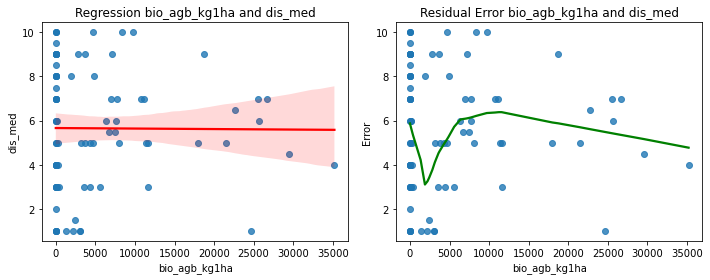

dis_major
slope:  -3.830133483375536e-05
intersept:  5.5861488102346035
r2:  -0.10447679933801461
P_value:  0.3216267817423004
std error:  3.84316928857726e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


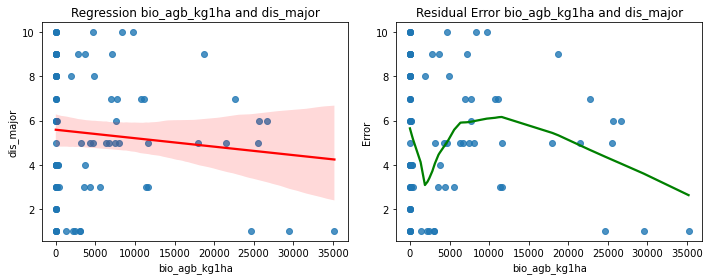

dis_minor
slope:  -4.2474962787579935e-06
intersept:  5.400837013878074
r2:  -0.01148543182612924
P_value:  0.9134708058714124
std error:  3.897945629912661e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


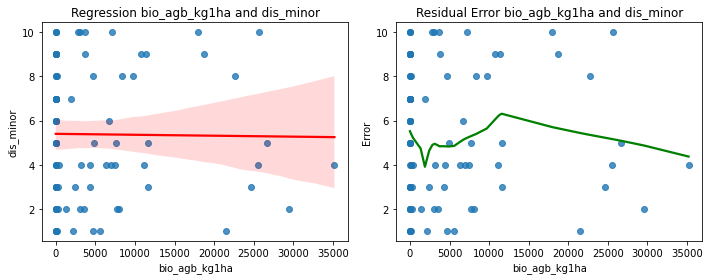

dka_min
slope:  -3.209453892862523e-05
intersept:  2.034596237435764
r2:  -0.08602021339538869
P_value:  0.4148956604445182
std error:  3.9182904030887915e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


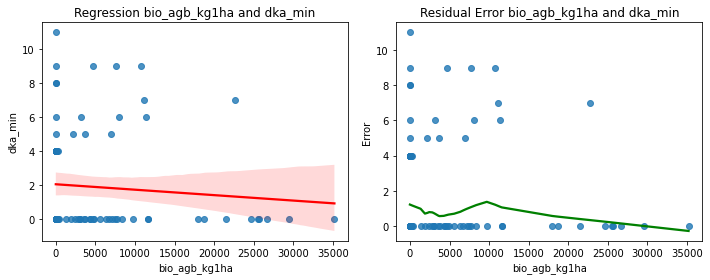

dka_max
slope:  -5.357848152457824e-05
intersept:  3.061704277837921
r2:  -0.12597818017084975
P_value:  0.23146521123999958
std error:  4.447335986020416e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


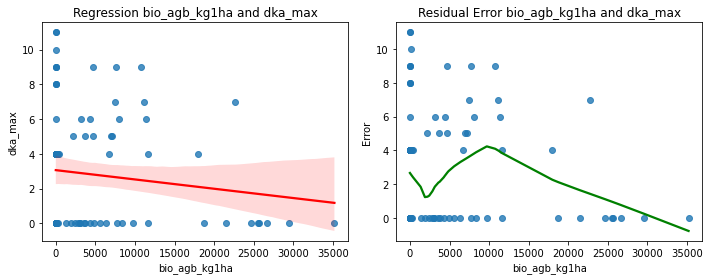

dka_mean
slope:  -3.024629549983724e-05
intersept:  2.4439521643033424
r2:  -0.08041502520833455
P_value:  0.4460581280429232
std error:  3.951891155887217e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


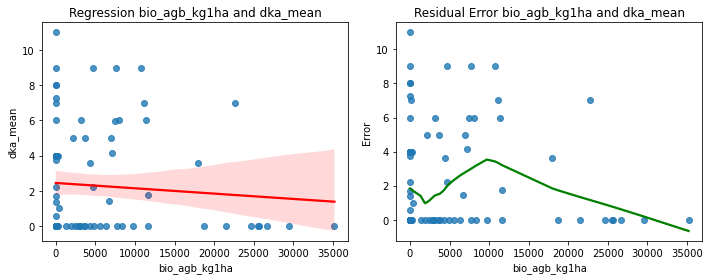

dka_med
slope:  -2.9719715854492008e-05
intersept:  2.414493467655973
r2:  -0.07591565650851015
P_value:  0.47199280462413884
std error:  4.114688528650213e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


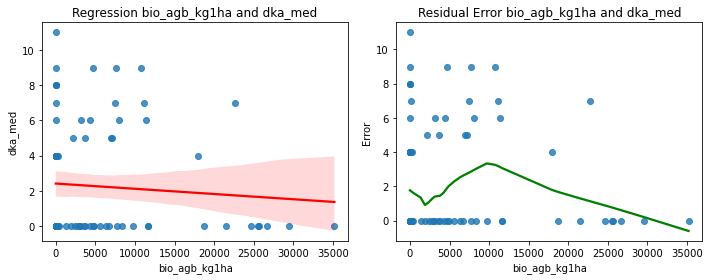

dka_major
slope:  -2.724366002381201e-05
intersept:  2.369991397559643
r2:  -0.07037523429653705
P_value:  0.5050190439611391
std error:  4.070485501205639e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


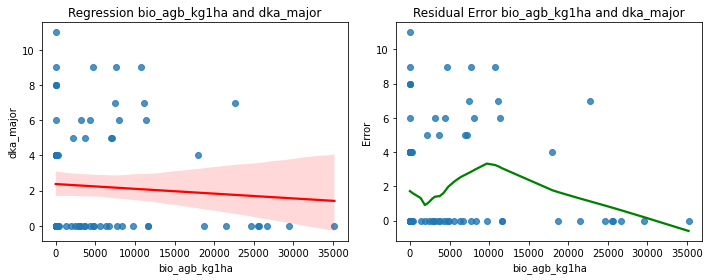

dka_minor
slope:  -5.347724876803147e-05
intersept:  2.637304977521383
r2:  -0.13081055581347478
P_value:  0.21391050360562738
std error:  4.272254924549774e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


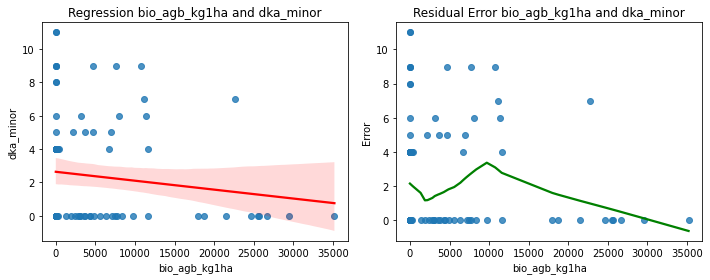

stc_min
slope:  0.0002993367885666229
intersept:  2.0730487910564888
r2:  0.7133487085697381
P_value:  1.4785991197081252e-15
std error:  3.0998222632859356e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


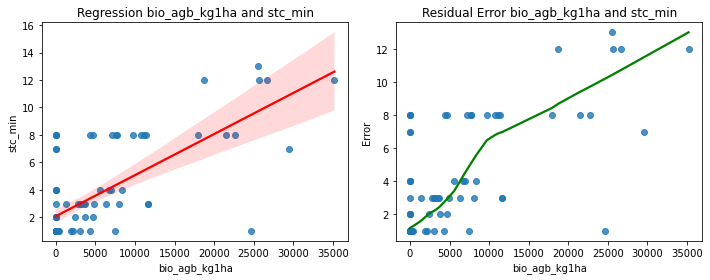

stc_max
slope:  0.0003192470574912921
intersept:  3.4774127069784107
r2:  0.665413063758307
P_value:  4.636168778977729e-13
std error:  3.775111636590503e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


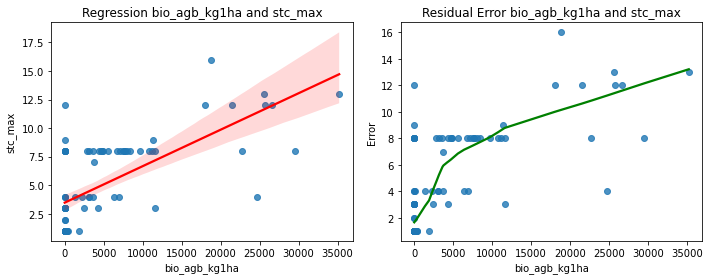

stc_mean
slope:  0.0003079330682115566
intersept:  2.780208897665531
r2:  0.7009102475406256
P_value:  7.326914205995407e-15
std error:  3.3030422620908444e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


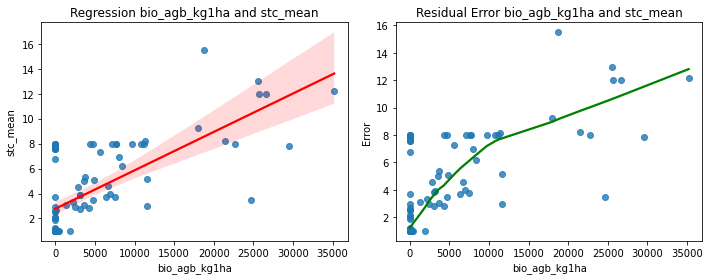

stc_med
slope:  0.00030591306470827725
intersept:  2.802330169274323
r2:  0.6851895571050681
P_value:  4.943375287787624e-14
std error:  3.427796094675965e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


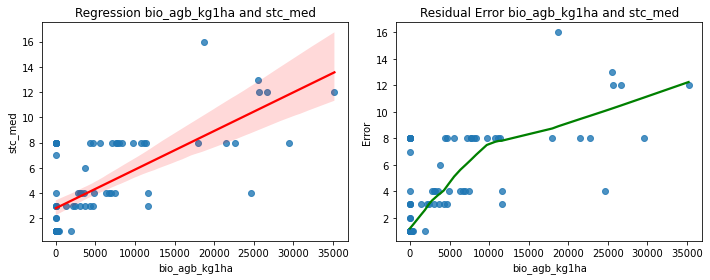

stc_major
slope:  0.0003106456065860142
intersept:  2.692641570201898
r2:  0.6952869130179125
P_value:  1.4709022211124107e-14
std error:  3.384909520006725e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


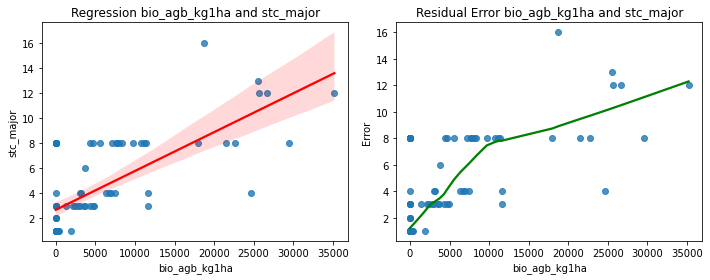

stc_minor
slope:  0.000302396976473162
intersept:  2.982262666530953
r2:  0.6568168410216559
P_value:  1.1645852871855895e-12
std error:  3.659419045797859e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


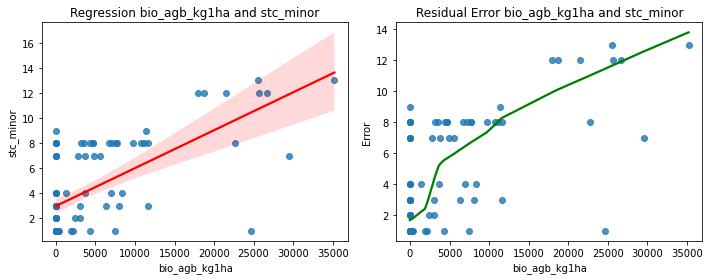

h99a2_min
slope:  0.00032935264602526105
intersept:  5.50791980569076
r2:  0.6549743623378499
P_value:  1.4132897091543618e-12
std error:  4.005317242820102e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


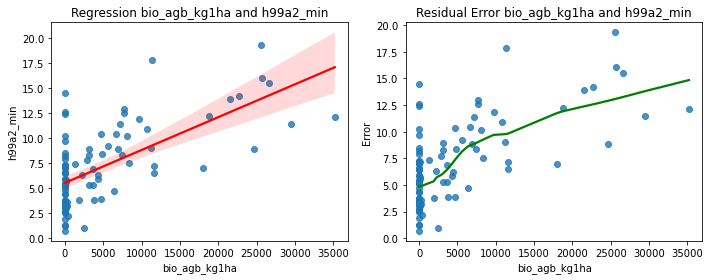

h99a2_max
slope:  0.00044630729504901593
intersept:  9.239381085750423
r2:  0.6887792519661793
P_value:  3.230816261466985e-14
std error:  4.951689315743975e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


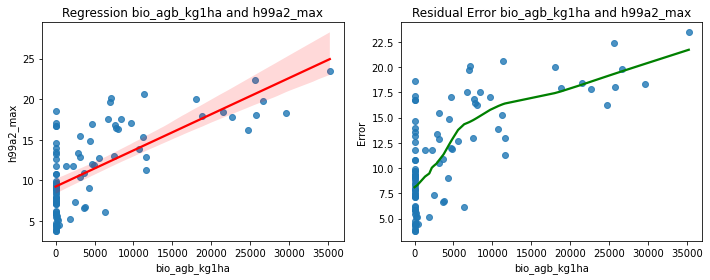

h99a2_mean
slope:  0.00036617676028940854
intersept:  7.438799724755281
r2:  0.6565194530382291
P_value:  1.2016514421756861e-12
std error:  4.4347716984584104e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


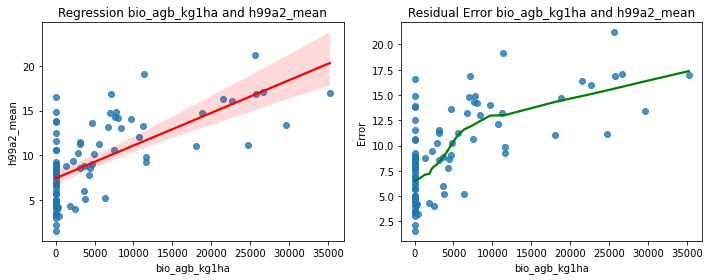

h99a2_med
slope:  0.0003579393223271283
intersept:  7.477365769700057
r2:  0.6404281157928723
P_value:  6.223379830066365e-12
std error:  4.524694190368499e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


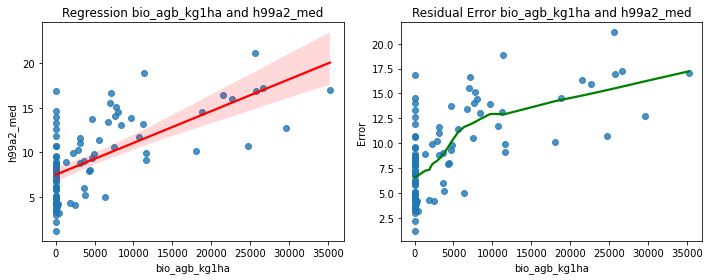

h99a2_std
slope:  2.4459556549408878e-05
intersept:  1.027803744687453
r2:  0.29857983209257605
P_value:  0.0038404975228767636
std error:  8.241197197295004e-06


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


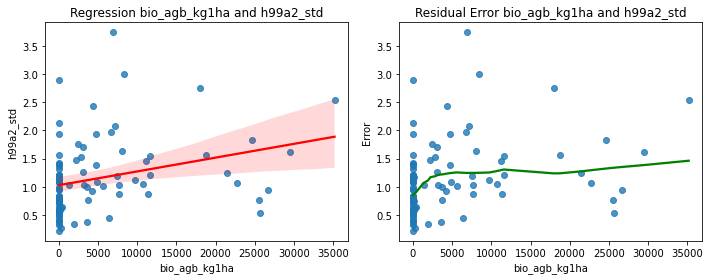

h99a2_p25
slope:  0.00035178743907158996
intersept:  6.7375998519177
r2:  0.6516393791780237
P_value:  1.9994782252340425e-12
std error:  4.316421975407279e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


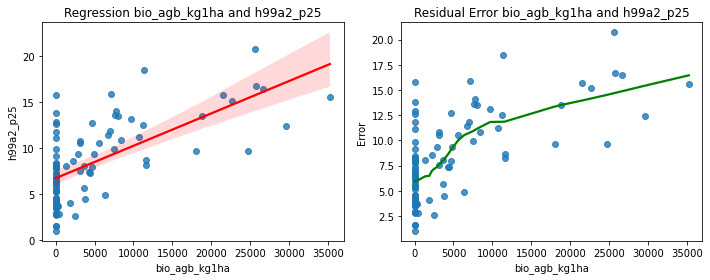

h99a2_p50
slope:  0.0003579393223271283
intersept:  7.477365769700057
r2:  0.6404281157928723
P_value:  6.223379830066365e-12
std error:  4.524694190368499e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


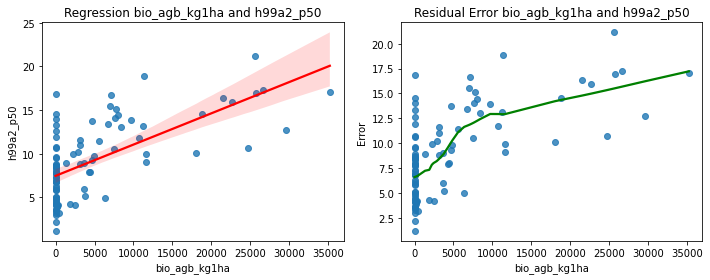

h99a2_p75
slope:  0.000378751052755234
intersept:  8.170529380631802
r2:  0.6432446965818204
P_value:  4.6995125144983996e-12
std error:  4.752178206684617e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


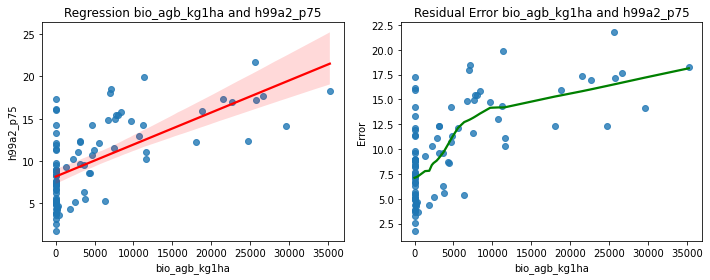

h99a2_p95
slope:  0.0004010030985454331
intersept:  8.901519179021959
r2:  0.654958526669549
P_value:  1.4156345564052815e-12
std error:  4.8768778769987284e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


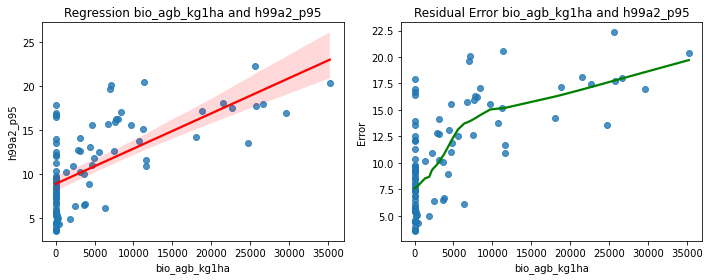

h99a2_p99
slope:  0.00043716442194025615
intersept:  9.171464996017693
r2:  0.6834931895842341
P_value:  6.031105645253048e-14
std error:  4.921376323321026e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


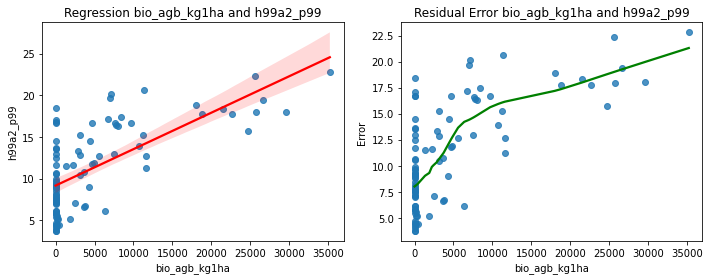

fpca2_min
slope:  0.0008883004982625128
intersept:  2.7041259898256316
r2:  0.7517655191504914
P_value:  5.877365760976827e-18
std error:  8.21344378249185e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


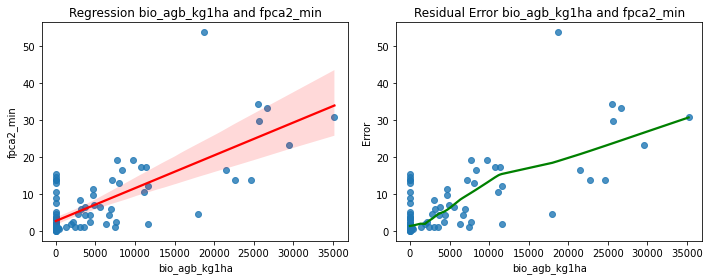

fpca2_max
slope:  0.001341756888014858
intersept:  9.182403005076555
r2:  0.7391703530500645
P_value:  4.0039608026013865e-17
std error:  0.00012887170595267828


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


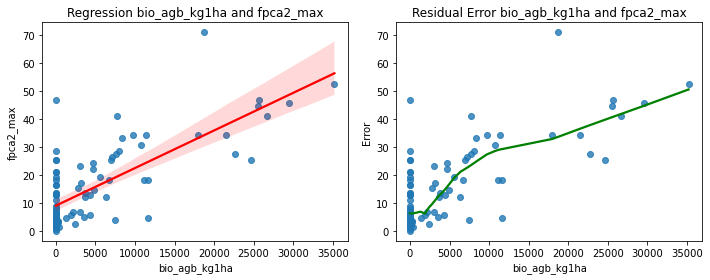

fpca2_mean
slope:  0.0011059623442743534
intersept:  5.379345918642328
r2:  0.7620777340514012
P_value:  1.1193738249852478e-18
std error:  9.904895278087051e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


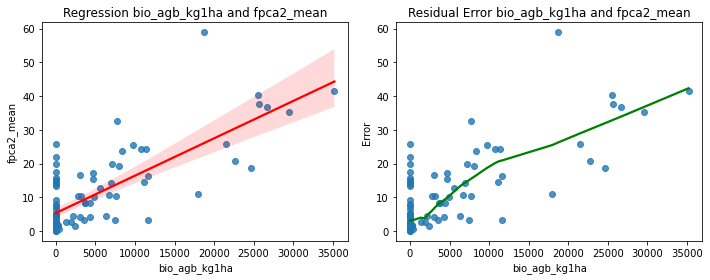

fpca2_med
slope:  0.0011008818437854638
intersept:  5.268674853778674
r2:  0.7536570260922764
P_value:  4.362503651659359e-18
std error:  0.00010120177319528526


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


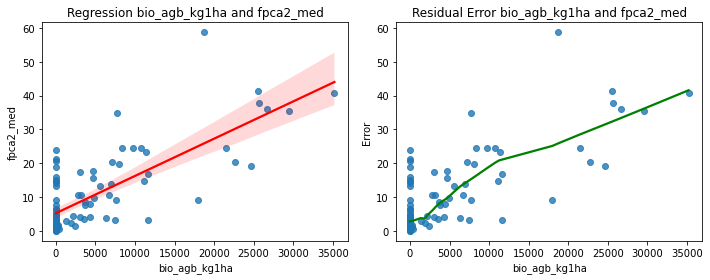

fpca2_p25
slope:  0.0010318879255689067
intersept:  4.1710987460826034
r2:  0.7610027878880093
P_value:  1.3357918060623901e-18
std error:  9.272598756188623e-05


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


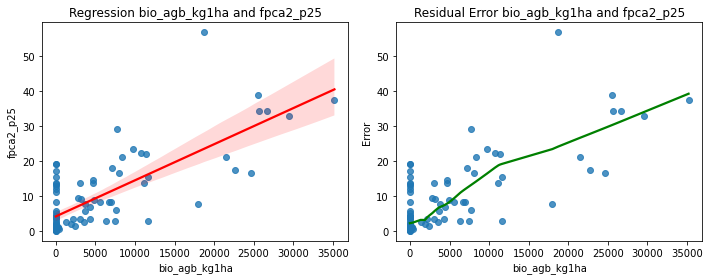

fpca2_p50
slope:  0.0011008818437854638
intersept:  5.268674853778674
r2:  0.7536570260922764
P_value:  4.362503651659359e-18
std error:  0.00010120177319528526


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


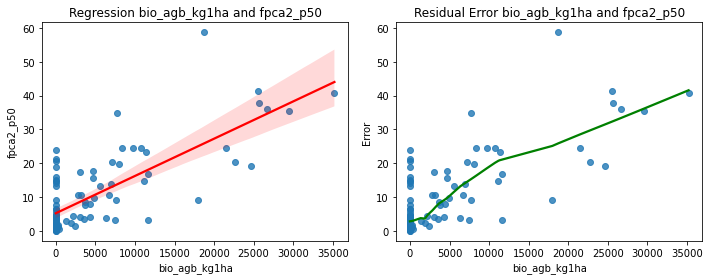

fpca2_p75
slope:  0.001167433558640438
intersept:  6.403218265185515
r2:  0.7536006041263041
P_value:  4.4016344085490214e-18
std error:  0.0001073383322240735


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


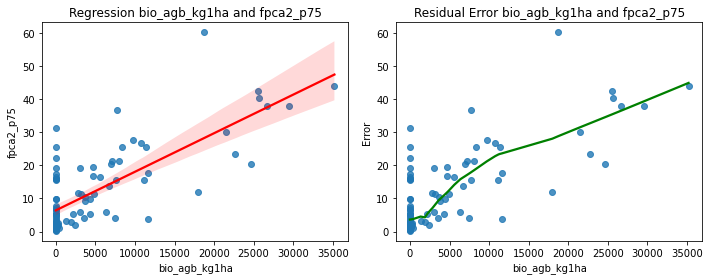

fpca2_p95
slope:  0.0012841000789039039
intersept:  8.01557105650965
r2:  0.7565035879718361
P_value:  2.771489158764473e-18
std error:  0.00011701389330512822


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


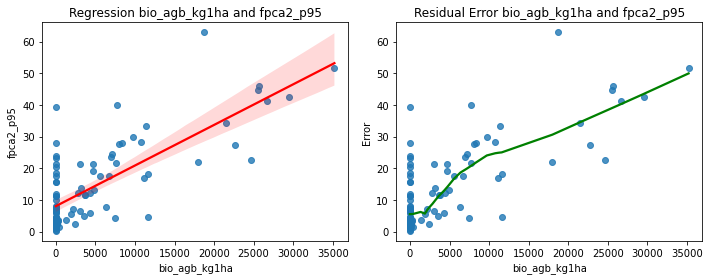

fpca2_p99
slope:  0.0013293070002696993
intersept:  8.946145518856918
r2:  0.7433280788050293
P_value:  2.1516651284998663e-17
std error:  0.00012609627054733824


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


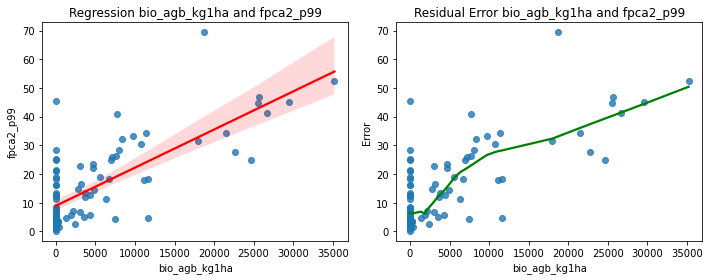

ratio32m
slope:  -119.58155300644411
intersept:  14719063.387970533
r2:  -0.5496454753826392
P_value:  1.3919829910865994e-08
std error:  19.15815659571203


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


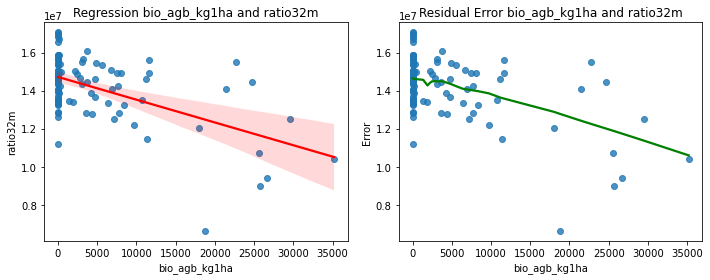

ratio42m
slope:  850.4606005461685
intersept:  27838651.750856966
r2:  0.6701958275946107
P_value:  2.740678041023373e-13
std error:  99.275708312535


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


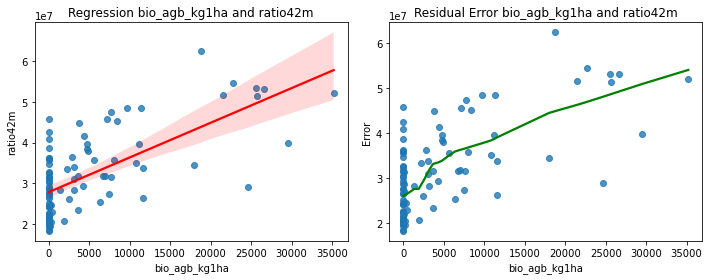

ratio43m
slope:  1039.1562854048957
intersept:  18649468.99800002
r2:  0.6887645707008755
P_value:  3.2364813791508605e-14
std error:  115.29696720525709


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


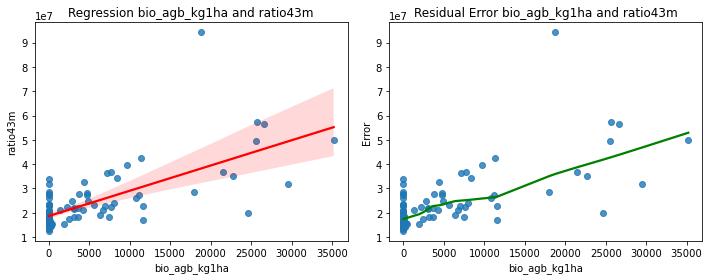

ratio52m
slope:  212.6363415713577
intersept:  33925210.33523594
r2:  0.2147091753164764
P_value:  0.039850404740040424
std error:  101.95700055536385


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


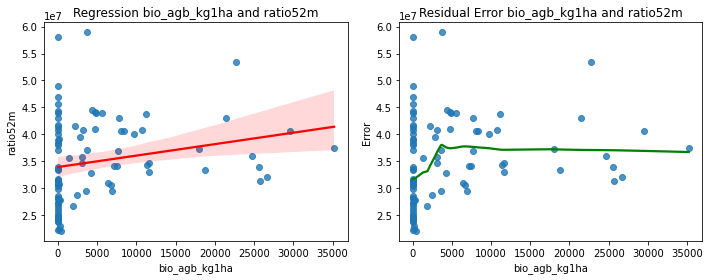

ratio53m
slope:  440.24422112881024
intersept:  22989743.617272086
r2:  0.5386345270188909
P_value:  3.051840529993893e-08
std error:  72.58861373846204


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


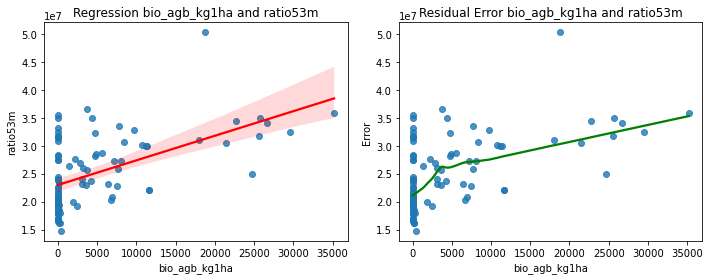

ratio54m
slope:  -163.5877854794428
intersept:  12195417.160385648
r2:  -0.6085601674883331
P_value:  1.2337326712213876e-10
std error:  22.484190660744588


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


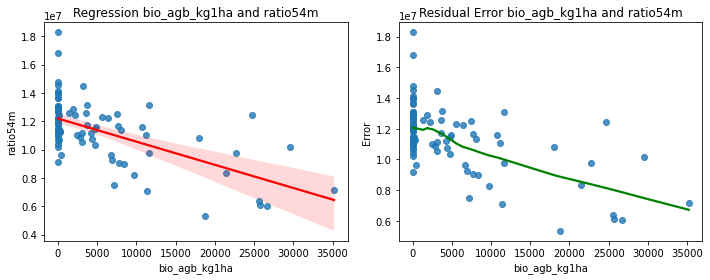

ratio62m
slope:  -99.97175566142883
intersept:  22517300.086340297
r2:  -0.14457210307381613
P_value:  0.16914306309162835
std error:  72.12483764063577


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


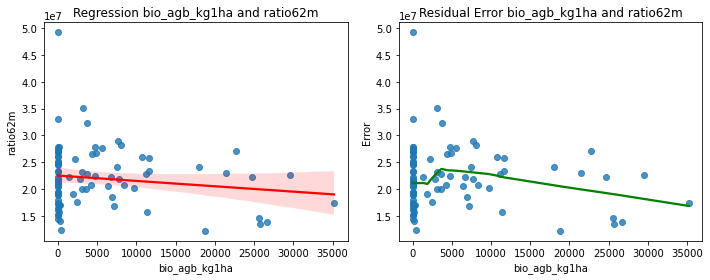

ratio63m
slope:  61.451165679230705
intersept:  15329158.677623207
r2:  0.14028244731239997
P_value:  0.1822856170429505
std error:  45.71825582050387


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


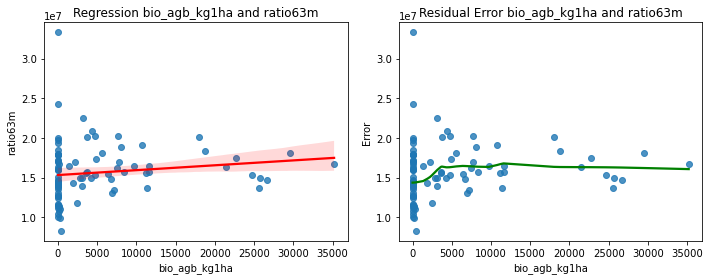

ratio64m
slope:  -163.47532498102288
intersept:  8232027.972720527
r2:  -0.5317349568049928
P_value:  4.920951891696871e-08
std error:  27.445643852474216


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


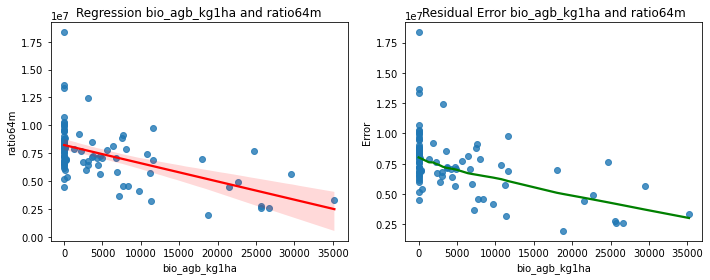

ratio65m
slope:  -67.853694003594
intersept:  6700835.719587971
r2:  -0.49255562950085824
P_value:  6.12113671451446e-07
std error:  12.637362316827815


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


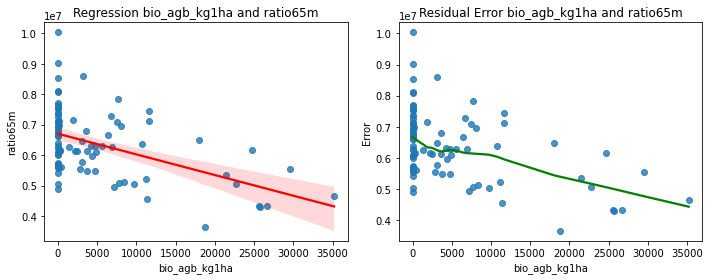

GSAVIm
slope:  22.15761968865749
intersept:  2695258.0060812435
r2:  0.35878349377722707
P_value:  0.0004447985587333038
std error:  6.0764072400225295


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


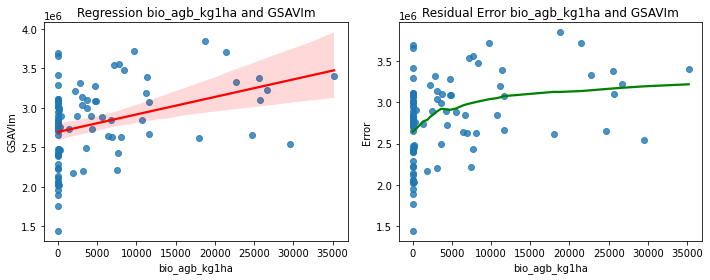

GNDVIm
slope:  83.59688201276616
intersept:  4575031.544523988
r2:  0.6012569850767263
P_value:  2.3361954869164096e-10
std error:  11.710778122185864


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


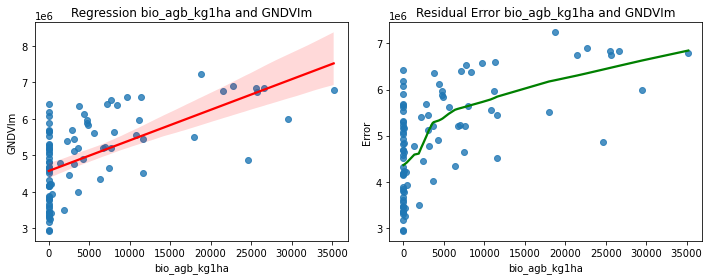

CVIm
slope:  617.8673708475609
intersept:  41445928.05870032
r2:  0.39848417668645403
P_value:  8.350442477739733e-05
std error:  149.9046939532016


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


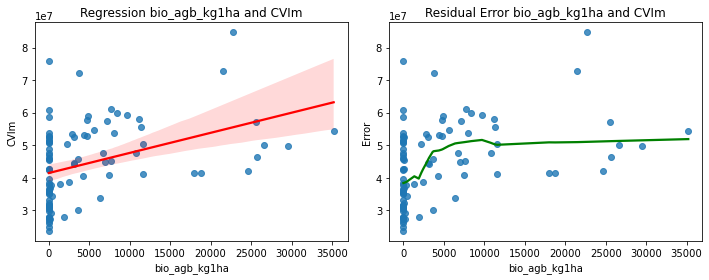

NDGIm
slope:  48.78014809773577
intersept:  -1903252.7020962792
r2:  0.5617580399987774
P_value:  5.6767940226353126e-09
std error:  7.572450040914558


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


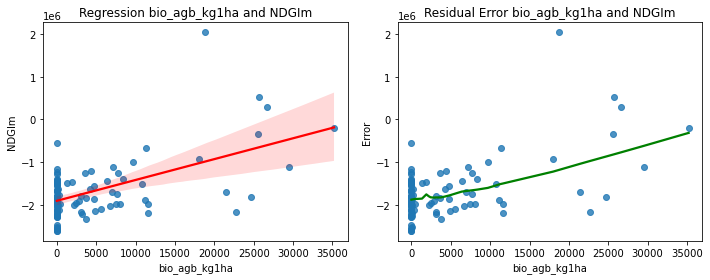

RIm
slope:  -48.78014809773577
intersept:  1903252.7020962792
r2:  -0.5617580399987774
P_value:  5.6767940226353126e-09
std error:  7.572450040914558


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


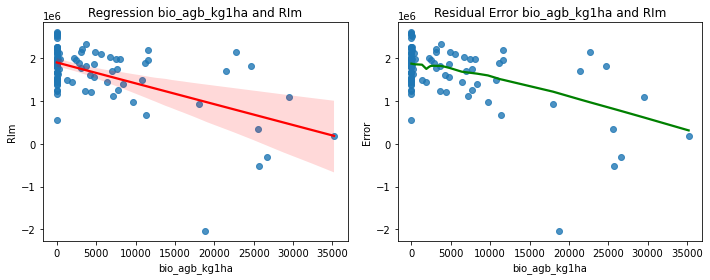

NBRm
slope:  126.99883438200955
intersept:  1070833.1590106585
r2:  0.6194971437948235
P_value:  4.597341110610882e-11
std error:  16.963217304825143


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


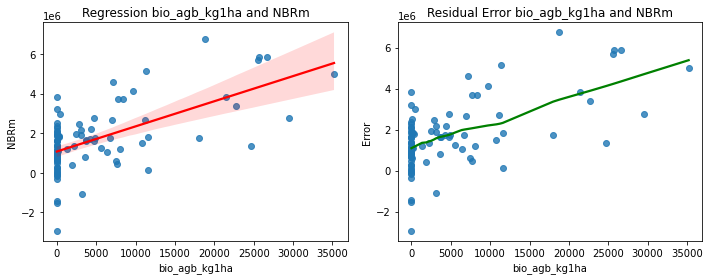

NDIIm
slope:  84.34203290166762
intersept:  -964395.6686406111
r2:  0.6536114549785716
P_value:  1.6294419106925442e-12
std error:  10.294414521781265


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


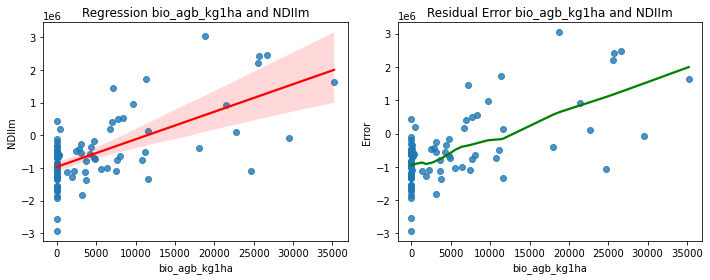

GDVIm
slope:  3.5972021103320455
intersept:  1505851.7970720297
r2:  0.10202036258624747
P_value:  0.333197482070961
std error:  3.6973007262586095


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


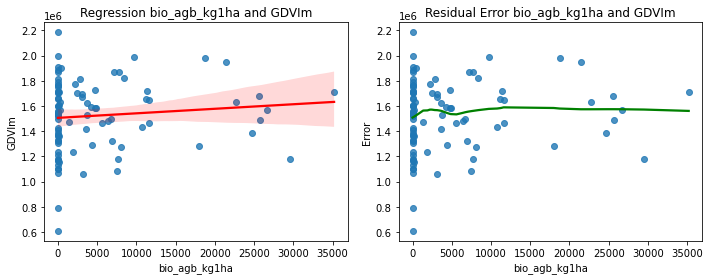

MSAVIm
slope:  44.395324039688965
intersept:  1636350.6849481142
r2:  0.5782328229925542
P_value:  1.5795601549384915e-09
std error:  6.602906691372355


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


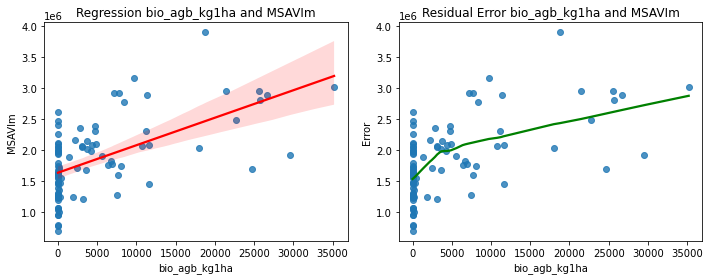

DVIm
slope:  18.884211092953596
intersept:  1075629.3921655281
r2:  0.468119407977604
P_value:  2.5333085224134547e-06
std error:  3.7575840725452747


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


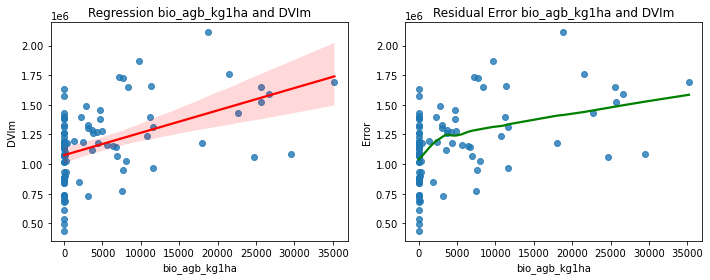

SAVIm
slope:  50.202117270384356
intersept:  1846796.260359028
r2:  0.5969159904228639
P_value:  3.3887500523154e-10
std error:  7.112567252007398


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


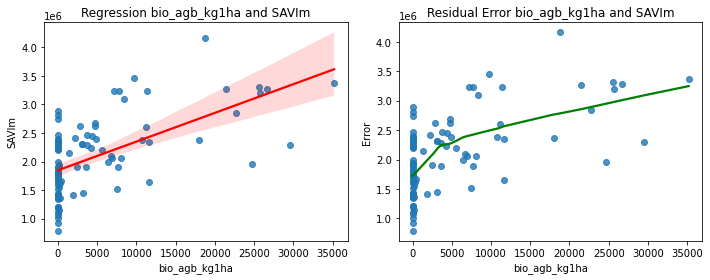

NDVIm
slope:  129.25827928252332
intersept:  2960182.939350996
r2:  0.6886255312171335
P_value:  3.290611232059752e-14
std error:  14.347035421355566


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


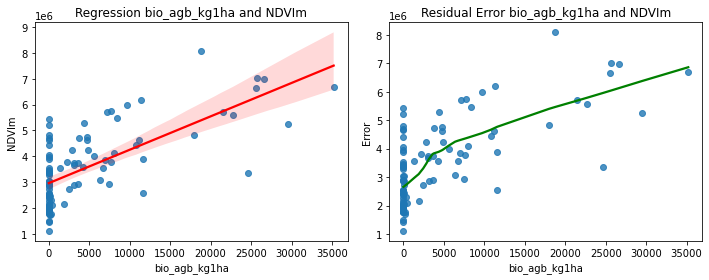

MSRm
slope:  291.0082678500673
intersept:  3637332.630293374
r2:  0.7098524627731017
P_value:  2.3383033168150297e-15
std error:  30.43720316785304


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


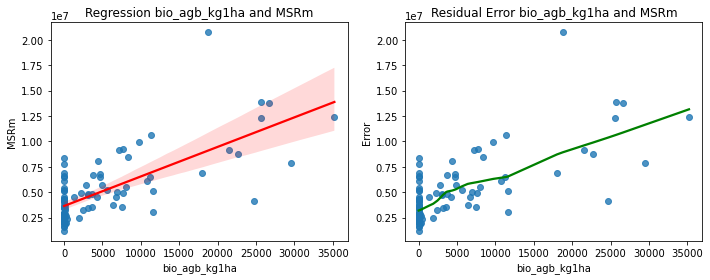

basal_dt


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: can't multiply sequence by non-int of type 'float'

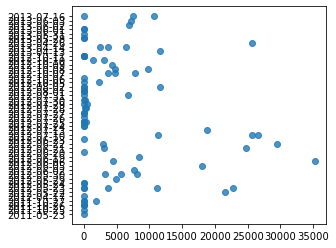

In [52]:
for i in df.columns[1:]:
    print(i)
    value_x = 'bio_agb_kg1ha'
    value_y_loop = str(i)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(df[value_x], df[value_y_loop], line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y_loop])

    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(df[value_x], df[value_y_loop], lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    

slope:  0.0011008818437854638
intersept:  5.268674853778674
r2:  0.7536570260922764
P_value:  4.362503651659359e-18
std error:  0.00010120177319528526


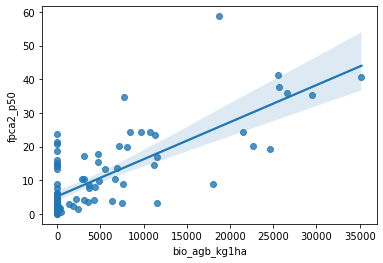

In [49]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

slope:  0.0011008818437854638
intersept:  5.268674853778674
r2:  0.7536570260922764
P_value:  4.362503651659359e-18
std error:  0.00010120177319528526


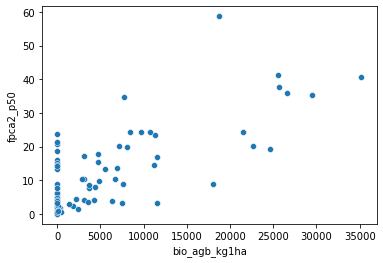

In [50]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b3_dbi_mean'
sns.scatterplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [51]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = df.iloc[:, 1:].astype('float32')
ydata1 = df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

ValueError: could not convert string to float: '2011-05-23'

### Plot up Histograms of Lidar meanCHM for train and test datasets

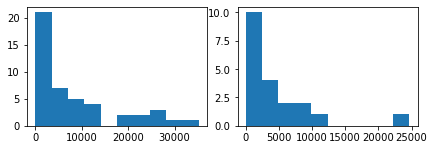

In [49]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [74]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
rfrModel_1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x1EE24F24AE8)

In [51]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=6), n_estimators=300, random_state=rng)
rfrModel_1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x1EE2296AD08)

In [52]:
rng = np.random.RandomState(1)
rfrModel_1 = abr(dtr(max_depth=8), n_estimators=300, random_state=rng)
rfrModel_1

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x1EE2296AE18)

In [53]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
# rfrModel_1,

In [54]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1,

In [55]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [56]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [75]:
np.nan_to_num(X_1)

array([[2.3000000e+01, 4.6000000e+01, 3.3250000e+01, ..., 2.9932170e+06,
        6.8015410e+06, 1.2919450e+07],
       [2.2000000e+01, 3.5000000e+01, 2.5375000e+01, ..., 2.7792850e+06,
        7.5260260e+06, 1.6616082e+07],
       [2.0000000e+01, 3.4000000e+01, 2.8650000e+01, ..., 3.1685000e+05,
        1.1653120e+06, 1.2419020e+06],
       ...,
       [1.3000000e+01, 2.2000000e+01, 1.6680000e+01, ..., 2.6855230e+06,
        4.8382700e+06, 6.9548520e+06],
       [1.2000000e+01, 1.9000000e+01, 1.5812500e+01, ..., 3.9911300e+05,
        1.2785390e+06, 1.3718680e+06],
       [1.8000000e+01, 2.3000000e+01, 2.0062500e+01, ..., 2.3190660e+06,
        4.3985240e+06, 6.0327400e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [76]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 1.00
Fitted model mse = 43236.86
n = 46


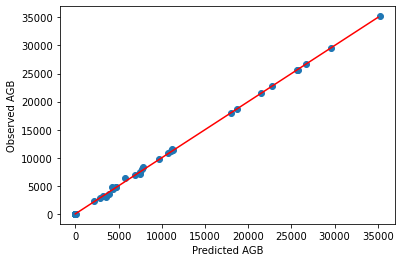

In [77]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')
plt.show()

In [78]:
pd.set_option('display.float_format', '{:.6f}'.format)

             band                       n        m
178    b3_dbg_min     0.20237208608374482 0.202372
330          MSRt     0.03174304190462353 0.031743
310      ratio43t    0.030285789958417263 0.030286
319        GNDVIt    0.030044513609257008 0.030045
186    b3_dbg_p95     0.02576972111376196 0.025770
187    b3_dbg_p99      0.0240201868682074 0.024020
213    b6_dbg_p25    0.023836126208090537 0.023836
208    b6_dbg_min    0.023451223902602836 0.023451
185    b3_dbg_p75    0.023355276547567753 0.023355
180   b3_dbg_mean    0.021768709330392547 0.021769
216    b6_dbg_p95    0.020454203775736368 0.020454
309      ratio42t    0.020315978558082568 0.020316
214    b6_dbg_p50     0.01773613886443258 0.017736
183    b3_dbg_p25     0.01746794203639529 0.017468
215    b6_dbg_p75    0.017121806269056603 0.017122
291   b2_dp1a_std    0.017068571283597705 0.017069
181    b3_dbg_med     0.01590230672737556 0.015902
217    b6_dbg_p99    0.015623455020020214 0.015623
259   b2_dp1d_max     0.0155345

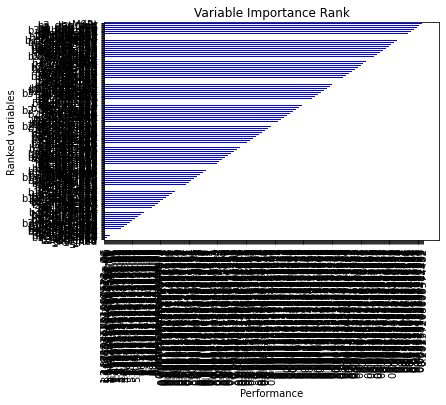

In [79]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
#print(df_band.columns)

#print(df_band.n.tolist())
list_ = df_band.n.tolist()

float_list = []

for i in list_:
    #print(type(i))
    float_num = round(float(i), 10)
    #print(type(float_num),float_num)
    float_list.append(float_num)


df_band['m'] = float_list    
# df['n'].astype('float')
dfsort = df_band.sort_values(['m'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['m'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 

In [80]:
dfsort.to_csv(os.path.join(output_, "rf_variable_score4.csv"))

In [81]:
variable_imp_list = dfsort.band.to_list()

In [82]:
var_not_imp = variable_imp_list[25:]

In [83]:
print(list(var_not_imp))

['GNDVIa', 'fpca2_p99', 'b6_dbg_mean', 'stc_max', 'fpca2_max', 'fpca2_p95', 'b3_dp1d_p25', 'b3_dbg_max', 'b1_dbg_min', 'b2_dp1d_p75', 'b1_dja_min', 'b2_dbg_p99', 'b5_dbg_p95', 'b5_dbg_max', 'b5_dbi_mean', 'b2_dim_std', 'b5_dbg_p99', 'fpca2_mean', 'h99a2_min', 'fpca2_p25', 'b5_dbg_med', 'b3_dbi_p25', 'b2_dp1d_p50', 'b5_dbg_mean', 'b2_dbi_p75', 'CVIa', 'stc_mean', 'NBRt', 'b4_dbi_std', 'b3_dim_std', 'ratio63a', 'h99a2_max', 'ratio54t', 'b1_dja_max', 'b3_dp1a_min', 'b2_dbi_p99', 'b6_dbg_max', 'ratio52a', 'NBRa', 'b2_dp1d_p25', 'b3_dbi_min', 'b2_dbi_p50', 'ratio53a', 'b3_dp1a_p50', 'b3_dbi_p50', 'dis_med', 'b5_dbg_p25', 'b2_dp0_p95', 'dis_mean', 'b1_dp1a_std', 'h99a2_p99', 'b5_dbg_p50', 'b1_dja_p99', 'dis_major', 'b3_dp1d_min', 'b1_dbg_p25', 'NDVIa', 'b1_dbg_std', 'b5_dbi_std', 'b2_dbg_max', 'b2_dbg_p95', 'stc_med', 'b2_dbg_min', 'b5_dbg_min', 'b6_dbi_std', 'b3_dbg_std', 'b6_dbg_std', 'ratio62a', 'b1_dp0_p95', 'b3_dbi_std', 'b1_dp1d_std', 'b3_dp1d_p95', 'b3_dp1d_std', 'b3_dp1a_std', 'b3_dp

In [84]:
print(list(df_ml))

['bio_agb_kg1ha', 'ratio42a', 'b3_dbg_min', 'b3_dbg_mean', 'b3_dbg_med', 'b3_dbg_p25', 'b3_dbg_p50', 'b3_dbg_p75', 'b3_dbg_p95', 'b3_dbg_p99', 'b4_dbg_std', 'b6_dbg_min', 'b6_dbg_med', 'b6_dbg_p25', 'b6_dbg_p50', 'b6_dbg_p75', 'b6_dbg_p95', 'b6_dbg_p99', 'b2_dp1d_max', 'b2_dp1d_p99d', 'b2_dp1a_std', 'ratio42t', 'ratio43t', 'GNDVIt', 'NDVIt', 'MSRt']


In [85]:
df

bio_agb_kg1ha  ratio42a  b3_dbg_min  b3_dbg_mean  b3_dbg_med  b3_dbg_p25  \
0         0.000000  32706438  475.000000   515.777778  517.000000  498.000000   
1         0.000000  18418978  954.000000  1002.777778 1019.000000  976.000000   
3         0.000000  18292979  562.000000   596.444444  597.000000  594.000000   
6         0.000000  20015453 1041.000000  1079.111111 1066.000000 1063.000000   
13        0.000000  40946620  735.000000   756.000000  753.000000  747.000000   
28    21469.140000  51677344  380.000000   455.625000  451.500000  435.000000   
29        0.000000  45816452  548.000000   598.500000  600.000000  588.500000   
30        0.000000  32484513  877.000000   925.777778  915.000000  899.000000   
31    22699.390000  54581558  376.000000   444.250000  443.000000  420.250000   
32    11180.400000  39614282  543.000000   617.555556  604.000000  574.000000   
33     3742.200000  44867972  519.000000   563.500000  560.000000  548.250000   
34        0.000000  26479735  571.000000   605.444444  606.000000  594.000000   
35        0.000000  26832642  435.000000   472.444444  475.000000  462.000000   
36     4872.777000  38025400  579.000000   642.333333  635.000000  604.500000   
37     8031.450000  35810317  468.000000   537.916667  539.500000  529.500000   
38     3156.902000  28253369  650.000000   759.583333  764.500000  732.500000   
39     5588.142000  35635329  557.000000   624.500000  615.500000  578.750000   
40     7658.542500  31644888  540.000000   600.937500  598.000000  565.500000   
41    17994.760000  34468329  283.000000   332.222222  348.000000  306.000000   
44    35199.710000  52129675  215.000000   258.142857  242.000000  237.000000   
45     4370.912000  41520653  465.000000   542.666667  550.000000  522.000000   
54     8376.216104  45222491  500.000000   554.000000  551.000000  524.000000   
55        0.000000  31901414  945.000000  1067.250000 1087.500000 1001.750000   
56     3086.160000  33966111  474.000000   516.888889  508.000000  495.000000   
57    24670.800000  29002054  328.000000   394.500000  384.000000  353.250000   
58     2832.032000  36346206  691.000000   793.250000  803.000000  785.750000   
59    29521.800000  39944497  147.000000   202.333333  215.000000  198.000000   
74    25701.690000  51409545  311.000000   331.250000  325.000000  317.250000   
75    26636.295000  53106342  355.000000   387.333333  379.000000  368.000000   
76    11338.127500  48555568  467.000000   520.062500  526.500000  511.250000   
80    18757.200000  62478929  278.000000   307.100000  306.500000  296.750000   
83        0.000000  28664930 1592.000000  1656.555556 1662.000000 1603.000000   
84        0.000000  29368546 1445.000000  1523.583333 1536.000000 1503.750000   
87        0.000000  25238460 1337.000000  1395.916667 1397.500000 1376.500000   
89      240.240000  20451620 1666.000000  1744.333333 1749.000000 1726.250000   
90        0.000000  22311632 1575.000000  1638.166667 1629.000000 1614.000000   
98      406.560000  22946224 1962.000000  2138.833333 2154.000000 2072.750000   
101    6699.000000  31665913  966.000000  1107.000000 1112.000000 1040.000000   
105      55.440000  27284198 1404.000000  1457.333333 1467.000000 1445.000000   
107   11596.200000  33842014  839.000000   957.555556  962.000000  888.000000   
110    2217.600000  33424025 1100.000000  1123.888889 1122.000000 1117.000000   
111       0.000000  30345508 1072.000000  1126.444444 1132.000000 1106.000000   
112       0.000000  20019983 1486.000000  1716.250000 1769.500000 1609.000000   
113    7715.400000  47485686  721.000000   788.625000  795.000000  759.750000   
114    3648.393000  31696106 1064.000000  1130.833333 1144.500000 1111.750000   
115    4723.999000  38498876  921.000000   945.777778  947.000000  933.000000   
116    4717.188000  39594791 1008.000000  1044.777778 1043.000000 1031.000000   
117    9708.965000  48529868  815.000000   850.111111  853.000000  841.000000   
118    4268.880000  29312879 1030.00

In [86]:
# Drop multiple columns
df.drop(var_not_imp, axis = 1, inplace=True)

KeyError: "['GNDVIa' 'fpca2_p99' 'b6_dbg_mean' 'stc_max' 'fpca2_max' 'fpca2_p95'\n 'b3_dp1d_p25' 'b3_dbg_max' 'b1_dbg_min' 'b2_dp1d_p75' 'b1_dja_min'\n 'b2_dbg_p99' 'b5_dbg_p95' 'b5_dbg_max' 'b5_dbi_mean' 'b2_dim_std'\n 'b5_dbg_p99' 'fpca2_mean' 'h99a2_min' 'fpca2_p25' 'b5_dbg_med'\n 'b3_dbi_p25' 'b2_dp1d_p50' 'b5_dbg_mean' 'b2_dbi_p75' 'CVIa' 'stc_mean'\n 'NBRt' 'b4_dbi_std' 'b3_dim_std' 'ratio63a' 'h99a2_max' 'ratio54t'\n 'b1_dja_max' 'b3_dp1a_min' 'b2_dbi_p99' 'b6_dbg_max' 'ratio52a' 'NBRa'\n 'b2_dp1d_p25' 'b3_dbi_min' 'b2_dbi_p50' 'ratio53a' 'b3_dp1a_p50'\n 'b3_dbi_p50' 'dis_med' 'b5_dbg_p25' 'b2_dp0_p95' 'dis_mean' 'b1_dp1a_std'\n 'h99a2_p99' 'b5_dbg_p50' 'b1_dja_p99' 'dis_major' 'b3_dp1d_min'\n 'b1_dbg_p25' 'NDVIa' 'b1_dbg_std' 'b5_dbi_std' 'b2_dbg_max' 'b2_dbg_p95'\n 'stc_med' 'b2_dbg_min' 'b5_dbg_min' 'b6_dbi_std' 'b3_dbg_std'\n 'b6_dbg_std' 'ratio62a' 'b1_dp0_p95' 'b3_dbi_std' 'b1_dp1d_std'\n 'b3_dp1d_p95' 'b3_dp1d_std' 'b3_dp1a_std' 'b3_dp1d_max' 'ratio63t'\n 'b2_dp1d_std' 'b2_dp1d_med' 'b1_dim_std' 'b4_dbg_p95' 'b3_dp1a_mean'\n 'ratio64a' 'b4_dbi_min' 'GDVIa' 'b3_dp0_p95' 'b3_dp0_p99' 'ratio52t'\n 'MSAVIa' 'b4_dbg_med' 'b2_dim_p99' 'fpca2_med' 'b3_dim_p25' 'b3_dp0_p50'\n 'b3_dp0_p75' 'NDIIt' 'b1_dp1a_p25' 'b5_dbg_p75' 'b1_dja_std' 'b2_dim_p95'\n 'b6_dbi_p50' 'h99a2_p95' 'b3_dp0_std' 'b3_dp1d_p99' 'b1_dbi_min'\n 'b1_dbi_p75' 'b2_dp1d_mean' 'b1_dp0_std' 'dka_major' 'dis_min' 'NDIIa'\n 'b6_dbi_p75' 'b2_dim_p75' 'b2_dbg_mean' 'dka_mean' 'b1_dbi_std'\n 'fpca2_p75' 'dis_minor' 'CVIt' 'NDGIt' 'b3_dp0_max' 'b2_dim_p50'\n 'h99a2_mean' 'b2_dp0_std' 'b1_dbi_p25' 'b1_dp1d_p95' 'b2_dp0_min'\n 'b2_dim_mean' 'b6_dbi_mean' 'b4_dbg_max' 'b1_dbg_p99' 'b2_dp1a_mean'\n 'b1_dim_max' 'b2_dbi_min' 'b3_dp0_mean' 'b1_dim_min' 'b2_dbg_p50'\n 'b1_dp0_max' 'dis_max' 'b2_dbg_p25' 'b2_dbg_std' 'fpca2_p50'\n 'b1_dp1d_min' 'b2_dim_max' 'b3_dp0_min' 'h99a2_p75' 'b3_dp1a_p99'\n 'b4_dbi_med' 'b3_dp1a_p25' 'ratio53t' 'b3_dp1d_p75' 'b4_dbi_p50'\n 'b1_dbi_p95' 'GSAVIt' 'b3_dim_p95' 'b2_dp1a_p95' 'h99a2_std' 'b1_dp0_p25'\n 'b2_dp1d_p95' 'b1_dbi_p99' 'b1_dja_p50' 'GDVIt' 'b2_dbi_max' 'b3_dp0_p25'\n 'b3_dp1a_max' 'b3_dp1a_p75' 'RIt' 'b2_dp0_p25' 'b2_dp0_p99' 'fpca2_min'\n 'b1_dim_p99' 'b6_dbi_med' 'b6_dbi_p95' 'b4_dbg_min' 'b2_dp0_mean'\n 'b2_dim_med' 'b4_dbg_p75' 'b2_dp1a_p99' 'b2_dp1a_med' 'b5_dbi_p25'\n 'b1_dp1d_p50' 'b1_dbg_med' 'b4_dbi_max' 'b4_dbg_p99' 'h99a2_med' 'GSAVIa'\n 'b1_dbi_med' 'b1_dim_p25' 'b3_dim_max' 'b1_dp0_p99' 'b1_dp0_min'\n 'b6_dbi_max' 'b1_dim_p95' 'b4_dbg_p25' 'b2_dp1a_p75' 'b6_dbi_min'\n 'b2_dp0_p75' 'b6_dbi_p25' 'b5_dbi_max' 'b1_dp0_mean' 'b3_dp0_med'\n 'b5_dbi_min' 'b1_dbg_mean' 'ratio54a' 'b1_dbi_max' 'b2_dp1a_max'\n 'b5_dbi_p50' 'ratio32a' 'b5_dbi_p75' 'b1_dp1d_mean' 'b6_dbi_p99'\n 'b2_dp0_max' 'b3_dp1a_p95' 'b3_dp1a_med' 'b2_dbi_std' 'b1_dbi_mean'\n 'h99a2_p25' 'b1_dp1a_min' 'b1_dim_p75' 'b2_dbg_p75' 'b1_dim_p50'\n 'b4_dbi_p99' 'h99a2_p50' 'b1_dbg_max' 'b3_dbi_p95' 'b4_dbg_p50' 'NDGIa'\n 'b3_dim_med' 'b3_dbi_med' 'ratio65a' 'ratio62t' 'b1_dp1a_med'\n 'b3_dim_min' 'b3_dim_p99' 'b1_dja_p25' 'b1_dja_p75' 'b1_dp1a_p75'\n 'b1_dja_med' 'b2_dp1a_min' 'b2_dp1d_min' 'b1_dp1a_mean' 'b2_dp1a_p50'\n 'stc_min' 'SAVIa' 'b1_dim_mean' 'b1_dp1d_p99' 'b1_dp1d_p25' 'ratio32t'\n 'b1_dp0_p50' 'b1_dbg_p50' 'b1_dp1a_p99' 'b5_dbg_std' 'b2_dbi_p25'\n 'b1_dbg_p95' 'b5_dbi_p99' 'b5_dbi_p95' 'MSAVIt' 'b1_dbg_p75' 'ratio64t'\n 'b5_dbi_med' 'b4_dbi_p25' 'b2_dp0_p50' 'b3_dim_mean' 'b2_dim_p25'\n 'b3_dbi_mean' 'b3_dp1d_p50' 'b2_dp1a_p25' 'DVIa' 'RIa' 'b2_dim_min'\n 'b3_dim_p75' 'b1_dim_med' 'b1_dp1d_p75' 'b1_dp0_p75' 'b4_dbi_mean'\n 'b3_dbi_max' 'DVIt' 'ratio43a' 'b3_dp1d_mean' 'b1_dbi_p50' 'b1_dp0_med'\n 'b1_dp1d_max' 'b4_dbi_p75' 'b1_dp1d_med' 'b1_dp1a_p95' 'b2_dbi_mean'\n 'b1_dp1a_max' 'b3_dbi_p75' 'b3_dim_p50' 'b4_dbg_mean' 'ratio65t'\n 'b3_dp1d_med' 'b2_dp0_med' 'b2_dbg_med' 'b1_dja_p95' 'b4_dbi_p95'\n 'b1_dja_mean' 'SAVIt' 'b2_dbi_med' 'b1_dp1a_p50' 'MSRa' 'dka_max'\n 'b3_dbi_p99' 'stc_major' 'dka_min' 'b2_dbi_p95' 'dka_med'] not found in axis"

In [88]:
df_ml

bio_agb_kg1ha  ratio42a  b3_dbg_min  b3_dbg_mean  b3_dbg_med  b3_dbg_p25  \
0         0.000000  32706438  475.000000   515.777778  517.000000  498.000000   
1         0.000000  18418978  954.000000  1002.777778 1019.000000  976.000000   
3         0.000000  18292979  562.000000   596.444444  597.000000  594.000000   
6         0.000000  20015453 1041.000000  1079.111111 1066.000000 1063.000000   
13        0.000000  40946620  735.000000   756.000000  753.000000  747.000000   
28    21469.140000  51677344  380.000000   455.625000  451.500000  435.000000   
29        0.000000  45816452  548.000000   598.500000  600.000000  588.500000   
30        0.000000  32484513  877.000000   925.777778  915.000000  899.000000   
31    22699.390000  54581558  376.000000   444.250000  443.000000  420.250000   
32    11180.400000  39614282  543.000000   617.555556  604.000000  574.000000   
33     3742.200000  44867972  519.000000   563.500000  560.000000  548.250000   
34        0.000000  26479735  571.000000   605.444444  606.000000  594.000000   
35        0.000000  26832642  435.000000   472.444444  475.000000  462.000000   
36     4872.777000  38025400  579.000000   642.333333  635.000000  604.500000   
37     8031.450000  35810317  468.000000   537.916667  539.500000  529.500000   
38     3156.902000  28253369  650.000000   759.583333  764.500000  732.500000   
39     5588.142000  35635329  557.000000   624.500000  615.500000  578.750000   
40     7658.542500  31644888  540.000000   600.937500  598.000000  565.500000   
41    17994.760000  34468329  283.000000   332.222222  348.000000  306.000000   
44    35199.710000  52129675  215.000000   258.142857  242.000000  237.000000   
45     4370.912000  41520653  465.000000   542.666667  550.000000  522.000000   
54     8376.216104  45222491  500.000000   554.000000  551.000000  524.000000   
55        0.000000  31901414  945.000000  1067.250000 1087.500000 1001.750000   
56     3086.160000  33966111  474.000000   516.888889  508.000000  495.000000   
57    24670.800000  29002054  328.000000   394.500000  384.000000  353.250000   
58     2832.032000  36346206  691.000000   793.250000  803.000000  785.750000   
59    29521.800000  39944497  147.000000   202.333333  215.000000  198.000000   
74    25701.690000  51409545  311.000000   331.250000  325.000000  317.250000   
75    26636.295000  53106342  355.000000   387.333333  379.000000  368.000000   
76    11338.127500  48555568  467.000000   520.062500  526.500000  511.250000   
80    18757.200000  62478929  278.000000   307.100000  306.500000  296.750000   
83        0.000000  28664930 1592.000000  1656.555556 1662.000000 1603.000000   
84        0.000000  29368546 1445.000000  1523.583333 1536.000000 1503.750000   
87        0.000000  25238460 1337.000000  1395.916667 1397.500000 1376.500000   
89      240.240000  20451620 1666.000000  1744.333333 1749.000000 1726.250000   
90        0.000000  22311632 1575.000000  1638.166667 1629.000000 1614.000000   
98      406.560000  22946224 1962.000000  2138.833333 2154.000000 2072.750000   
101    6699.000000  31665913  966.000000  1107.000000 1112.000000 1040.000000   
105      55.440000  27284198 1404.000000  1457.333333 1467.000000 1445.000000   
107   11596.200000  33842014  839.000000   957.555556  962.000000  888.000000   
110    2217.600000  33424025 1100.000000  1123.888889 1122.000000 1117.000000   
111       0.000000  30345508 1072.000000  1126.444444 1132.000000 1106.000000   
112       0.000000  20019983 1486.000000  1716.250000 1769.500000 1609.000000   
113    7715.400000  47485686  721.000000   788.625000  795.000000  759.750000   
114    3648.393000  31696106 1064.000000  1130.833333 1144.500000 1111.750000   
115    4723.999000  38498876  921.000000   945.777778  947.000000  933.000000   
116    4717.188000  39594791 1008.000000  1044.777778 1043.000000 1031.000000   
117    9708.965000  48529868  815.000000   850.111111  853.000000  841.000000   
118    4268.880000  29312879 1030.00

In [89]:
y_2

array([ 1349.04  ,  6699.    ,  4268.88  ,  5588.142 ,     0.    ,
           0.    ,  2439.36  ,   240.24  ,     0.    ,     0.    ,
        3742.2   ,  7658.5425,  3086.16  ,   406.56  , 11596.2   ,
        3648.393 ,     0.    , 24670.8   ,  7715.4   ,     0.    ],
      dtype=float32)

### Predict the selected model on the test data

In [90]:
# plt.scatter(y2_predict, y_2)
# plt.show()

Predicted data r2 = 0.4054199152889558
MSE = 19475655.478
RMSE = 4413.123
bias = -214.284
n = 20


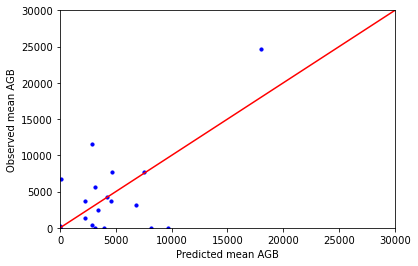

In [91]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

plt.show()

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

[1.79947598e+04 2.84380143e+03 9.70896484e+03 1.10880005e+02
 8.15107651e+03 7.50106865e+03 6.82430013e+03 4.67121899e+03
 3.94177705e+03 2.77199993e+00 3.26117639e+00 2.77199993e+01
 3.15690210e+03 3.08615991e+03 2.21760010e+03 2.84380143e+03
 4.53820036e+03 4.17247144e+03 2.21760010e+03 3.38025110e+03]
[24670.8    11596.2        0.      6699.         0.      7715.4
  3086.16    7658.5425     0.         0.         0.       240.24
  5588.142      0.      3648.393    406.56    3742.2     4268.88
  1349.04    2439.36  ]
[1.13835443e-09 1.81312191e-09 2.06363579e-09 2.34024312e-09
 2.48611555e-09 4.02751049e-09 4.59006969e-09 5.46183242e-09
 6.69706885e-09 7.26636086e-09 7.26723828e-09 7.28950844e-09
 7.33195272e-09 8.05717202e-09 8.80090189e-09 8.94970014e-09
 9.17807952e-09 9.34288382e-09 1.00459771e-08 1.01709440e-08]


# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import cPickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    cPickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv('combined_val_data_l5_l7_l8.csv', header=0)
print df.shape 

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['chm'] >= 4)]

print (df1.shape)

In [ ]:
xdata2 = df1[['dem', 'ratio42', 'psB5', 'CVI', 'ratio43', 'psB2', 'ratio54', 'SAVI', 'ratio53', 'ratio52', 'psB3', 'GSAVI', 'ratio65', 'ratio63', 'ratio62', 'psB4', 'ratio32']].astype('float32')

ydata1 = df1[['chm']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print len(ydata1)

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()